In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 13, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['figure.autolayout'] = True

In [ ]:
df = pd.read_excel("ECommerce_Dataset.xlsx", sheet_name="E Comm")

FileNotFoundError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ECommerce_Dataset.xlsx to ECommerce_Dataset.xlsx


In [ ]:
import io

df = pd.read_excel(io.BytesIO(uploaded['ECommerce_Dataset.xlsx']),sheet_name="E Comm")

In [ ]:
df.sample(10)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
3588       53589      0    17.0         Mobile Phone         1   
1842       51843      0    17.0         Mobile Phone         1   
4309       54310      0     1.0                Phone         1   
357        50358      1     0.0                Phone         3   
5024       55025      1     5.0             Computer         1   
102        50103      0     2.0             Computer         3   
3203       53204      1     1.0                Phone         1   
2824       52825      1     1.0                Phone         1   
778        50779      0     2.0         Mobile Phone         1   
3239       53240      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
3588             10.0           Debit Card    Male             4.0   
1842              9.0                  UPI    Male             2.0   
4309             10.0          Credit Card  Female             4.0   
357              19.0          Credit Card    Male             2.0   
5024             12.0           Debit Card    Male             4.0   
102               6.0          Credit Card  Female             2.0   
3203             17.0          Credit Card    Male             3.0   
2824             32.0           Debit Card    Male             3.0   
778              13.0           Debit Card    Male             2.0   
3239             15.0          Credit Card  Female             4.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
3588                         6              Others                  2   
1842                         3              Others                  1   
4309                         4        Mobile Phone                  4   
357                          3  Laptop & Accessory                  5   
5024                         5        Mobile Phone                  5   
102                          3             Fashion                  2   
3203                         4              Mobile                  3   
2824                         6        Mobile Phone                  3   
778                          3  Laptop & Accessory                  2   
3239                         4  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
3588      Divorced                5         0                          NaN   
1842       Married                5         1                          NaN   
4309        Single                3         0                         15.0   
357        Married                3         0                         17.0   
5024       Married                8         0                         18.0   
102       Divorced                2         0                         14.0   
3203        Single                3         1                         12.0   
2824        Single                3         0                         13.0   
778        Married                2         1                         11.0   
3239        Single                5         0                         12.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
3588         2.0         2.0                8.0          322.40  
1842         0.0         1.0                1.0          295.13  
4309         2.0         2.0                1.0          139.83  
357          0.0         1.0                2.0          142.33  
5024         1.0         2.0                1.0          146.07  
102          4.0         4.0                1.0          179.18  
3203         1.0         2.0                2.0          135.09  
2824         2.0         2.0                2.0          147.93  
778          0.0         1.0                0.0          166.23  
3239         2.0         5.0                4.0          186.42

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
#memeriksa kolom yang mmeiliki missing values
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
#memeriksa data yang duplikat
df.duplicated().any()

False

In [ ]:
#Memisahkan data berdasar jenis data
#Data Numeric

numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'int32') | (df.dtypes == int) | (df.dtypes == 'float64') | (df.dtypes == 'float32') |(df.dtypes == float)].columns.tolist()
numerical

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
#Data Categorical

categorical_num = ['Churn','CityTier','SatisfactionScore','Complain']
categorical_num

['Churn', 'CityTier', 'SatisfactionScore', 'Complain']

In [ ]:
#Data Target
target = df['Churn']
#Churn adalah nilai yang menunjukkan apakah pelanggan berhenti berlangganan (1) atau tidak (0)

In [ ]:
a = df[numerical].describe().T
a

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [ ]:
# Menambah baris data 'rasio' untuk persenan data yang kosong/NaN
a['NullCount'] = df.isna().sum()
a['Ratio'] = round(a['NullCount']/a['count'],3)
a

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  \
CustomerID                   51408.25  52815.50  54222.7500  55630.00   
Churn                            0.00      0.00      0.0000      1.00   
Tenure                           2.00      9.00     16.0000     61.00   
CityTier                         1.00      1.00      3.0000      3.00   
WarehouseToHome                  9.00     14.00     20.0000    127.00   
HourSpendOnApp                   2.00      3.00      3.0000      5.00   
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00   
SatisfactionScore                2.00      3.00      4.0000      5.00   
NumberOfAddress                  2.00      3.00      6.0000     22.00   
Complain                         0.00      0.00      1.0000      1.00   
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00   
CouponUsed                       1.00      1.00      2.0000     16.00   
OrderCount                       1.00      2.00      3.0000     16.00   
DaySinceLastOrder                2.00      3.00      7.0000     46.00   
CashbackAmount                 145.77    163.28    196.3925    324.99   

                             NullCount  Ratio  
CustomerID                           0  0.000  
Churn                                0  0.000  
Tenure                             264  0.049  
CityTier                             0  0.000  
WarehouseToHome                    251  0.047  
HourSpendOnApp                     255  0.047  
NumberOfDeviceRegistered             0  0.000  
SatisfactionScore                    0  0.000  
NumberOfAddress                      0  0.000  
Complain                             0  0.000  
OrderAmountHikeFromlastYear        265  0.049  
CouponUsed                         256  0.048  
OrderCount                         258  0.048  
DaySinceLastOrder                  307  0.058  
CashbackAmount                       0  0.000

In [ ]:
df[categorical_num].describe().T

count      mean       std  min  25%  50%  75%  max
Churn              5630.0  0.168384  0.374240  0.0  0.0  0.0  0.0  1.0
CityTier           5630.0  1.654707  0.915389  1.0  1.0  1.0  3.0  3.0
SatisfactionScore  5630.0  3.066785  1.380194  1.0  2.0  3.0  4.0  5.0
Complain           5630.0  0.284902  0.451408  0.0  0.0  0.0  1.0  1.0

In [ ]:
categorical = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [ ]:
df[categorical].describe().T

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986

In [ ]:
#menghitung jumlah value dari masing2 kolom (kategori)
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [ ]:
nums = df[numerical].describe().T
nums['unique'] = df[numerical].nunique().values.T
nums['range'] = round(nums['max'] - nums['min'], 2)
nums['variance'] = round((nums['std'])**2, 2)
nums['IQR'] = round(nums['75%']- nums['25%'], 2)

central = ['mean', '25%', '50%', '75%']
spread = ['min', 'max', 'range', 'std', 'variance', 'IQR']

nums[['count', 'unique'] + central + spread]

count  unique          mean       25%       50%  \
CustomerID                   5630.0    5630  52815.500000  51408.25  52815.50   
Churn                        5630.0       2      0.168384      0.00      0.00   
Tenure                       5366.0      36     10.189899      2.00      9.00   
CityTier                     5630.0       3      1.654707      1.00      1.00   
WarehouseToHome              5379.0      34     15.639896      9.00     14.00   
HourSpendOnApp               5375.0       6      2.931535      2.00      3.00   
NumberOfDeviceRegistered     5630.0       6      3.688988      3.00      4.00   
SatisfactionScore            5630.0       5      3.066785      2.00      3.00   
NumberOfAddress              5630.0      15      4.214032      2.00      3.00   
Complain                     5630.0       2      0.284902      0.00      0.00   
OrderAmountHikeFromlastYear  5365.0      16     15.707922     13.00     15.00   
CouponUsed                   5374.0      17      1.751023      1.00      1.00   
OrderCount                   5372.0      16      3.008004      1.00      2.00   
DaySinceLastOrder            5323.0      22      4.543491      2.00      3.00   
CashbackAmount               5630.0    2586    177.223030    145.77    163.28   

                                    75%      min       max    range  \
CustomerID                   54222.7500  50001.0  55630.00  5629.00   
Churn                            0.0000      0.0      1.00     1.00   
Tenure                          16.0000      0.0     61.00    61.00   
CityTier                         3.0000      1.0      3.00     2.00   
WarehouseToHome                 20.0000      5.0    127.00   122.00   
HourSpendOnApp                   3.0000      0.0      5.00     5.00   
NumberOfDeviceRegistered         4.0000      1.0      6.00     5.00   
SatisfactionScore                4.0000      1.0      5.00     4.00   
NumberOfAddress                  6.0000      1.0     22.00    21.00   
Complain                         1.0000      0.0      1.00     1.00   
OrderAmountHikeFromlastYear     18.0000     11.0     26.00    15.00   
CouponUsed                       2.0000      0.0     16.00    16.00   
OrderCount                       3.0000      1.0     16.00    15.00   
DaySinceLastOrder                7.0000      0.0     46.00    46.00   
CashbackAmount                 196.3925      0.0    324.99   324.99   

                                     std    variance      IQR  
CustomerID                   1625.385339  2641877.50  2814.50  
Churn                           0.374240        0.14     0.00  
Tenure                          8.557241       73.23    14.00  
CityTier                        0.915389        0.84     2.00  
WarehouseToHome                 8.531475       72.79    11.00  
HourSpendOnApp                  0.721926        0.52     1.00  
NumberOfDeviceRegistered        1.023999        1.05     1.00  
SatisfactionScore               1.380194        1.90     2.00  
NumberOfAddress                 2.583586        6.67     4.00  
Complain                        0.451408        0.20     1.00  
OrderAmountHikeFromlastYear     3.675485       13.51     5.00  
CouponUsed                      1.894621        3.59     1.00  
OrderCount                      2.939680        8.64     2.00  
DaySinceLastOrder               3.654433       13.35     5.00  
CashbackAmount                 49.207036     2421.33    50.62

##Insight Descriptive Analysis

1) Baris data yang ada missing values serta rasionya :
- **Tenure** = 4,9%
- **WareHouseToHome** = 4,7%
- **HourSpendOnApp** = 4,7%
- **OrderAmountHikeFromlastYear** = 4,9%
- **CouponUsed** = 4,8%
- **OrderCount** = 4,8%
- **DaySinceLastOrder** = 5,8%

2) Kolom dengan tipe data kurang sesuai (float64 >> int64)
- Tenure
- HourSpendOnApp
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder

3) Tidak ada data duplikat

4) Kolom data numerical yang memiliki nilai min/max terlalu jauh dari mean dan median:
- **Tenure**: min 0, max 61, mean 10, median 9
- **WarehouseToHome**: min 5, max 127, mean 15, median 14
- NumberOfAddress: min 1, max 22, mean 4, median 3
- OrderAmountHikeFromlastYear: min 11, max 26, mean 15, median 15
- CouponUsed: min 0, max 16, mean 1, median 1
- OrderCount: min 1, max 16, mean 3, median 2
- **DaySinceLastOrder**: min 0, max 46, mean 4, median 3
- **CashbackAmount**: min 0, max 324, mean 177, median 163

5) Pada kolom **PreferredLoginDevice** antara **Mobile Phone** dan **Phone** sepertinya jenis yang sama jadi digabung saja

6) Pada kolom **PreferredPaymentMode**:
- **Credit Card** dan **CC** itu sama, jadi akan digabung
- **Cash on Delivery** dan **COD** itu juga sama, jadi akan digabung
- awal ada **7** data unique karena ada yang sama jadi dikurangi tinggal **5** kategori

7) Pada kolom **PreferredOrderCat** antara **Mobile Phone** dan **Mobile** sepertinya jenis yang sama jadi digabung saja

In [ ]:
#mengubah value count pada beberapa kolom (digabung yg kategorinya sama)
df.loc[df['PreferredLoginDevice']=='Mobile Phone','PreferredLoginDevice'] = 'Phone'
df['PreferredPaymentMode'].replace({'CC':'Credit Card','Cash on Delivery':'COD'},inplace=True)
df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'}, inplace=True)

for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



### Proporsi Fitur Kategori
Apakah frekuensi dari nilai yang paling umum timpang?
- PreferredLoginDevice, top frequency mobile phone = 70,97%
- PreferredPaymentMode, top frequency Debit Card = 41,10 %
- Gender, top frequency Gender = 60,10 %
- PreferedOrderCat, top frequency mobile phone = 36,94 %
- MaritalStatus, top frequency Married = 53,30 %

# Univariate Analysis

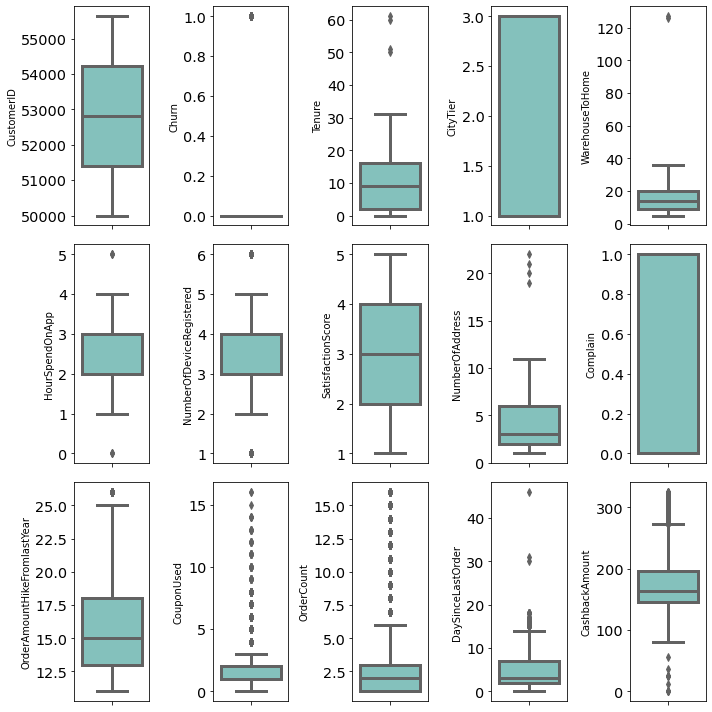

In [ ]:
#visualisasi untuk  melihat outlier
plt.figure(figsize=(10,10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[numerical[i]], palette='GnBu', orient='v')
    plt.tight_layout()

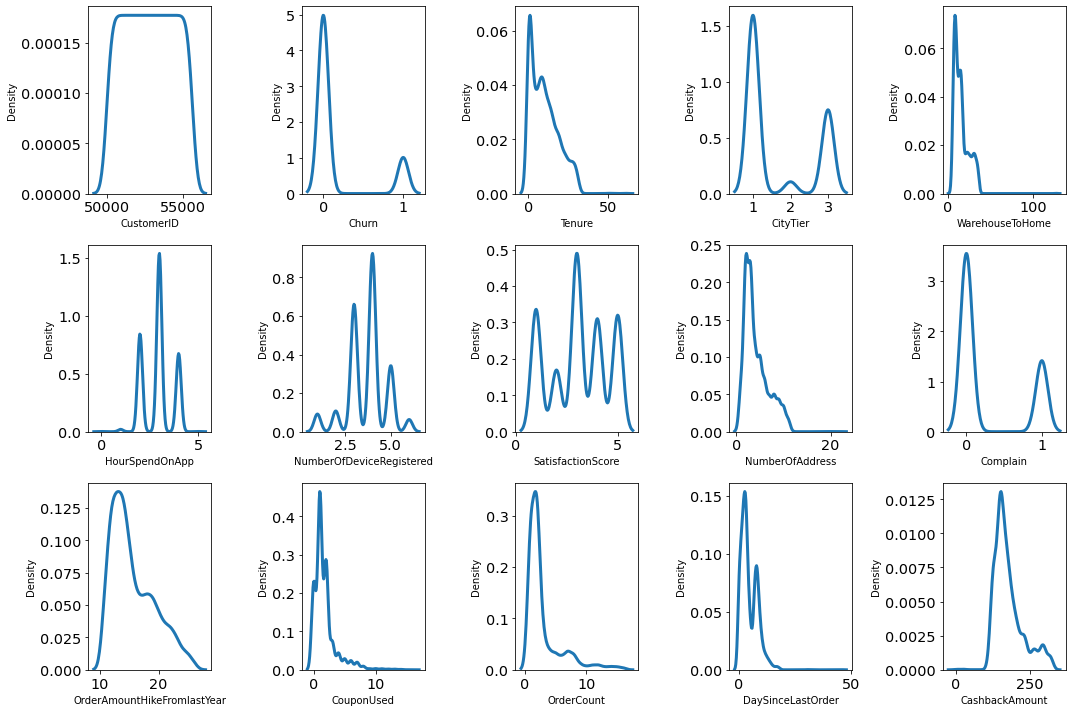

In [ ]:
plt.figure(figsize=(15,10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[numerical[i]], palette='GnBu')
    plt.xlabel(numerical[i])
    plt.tight_layout()

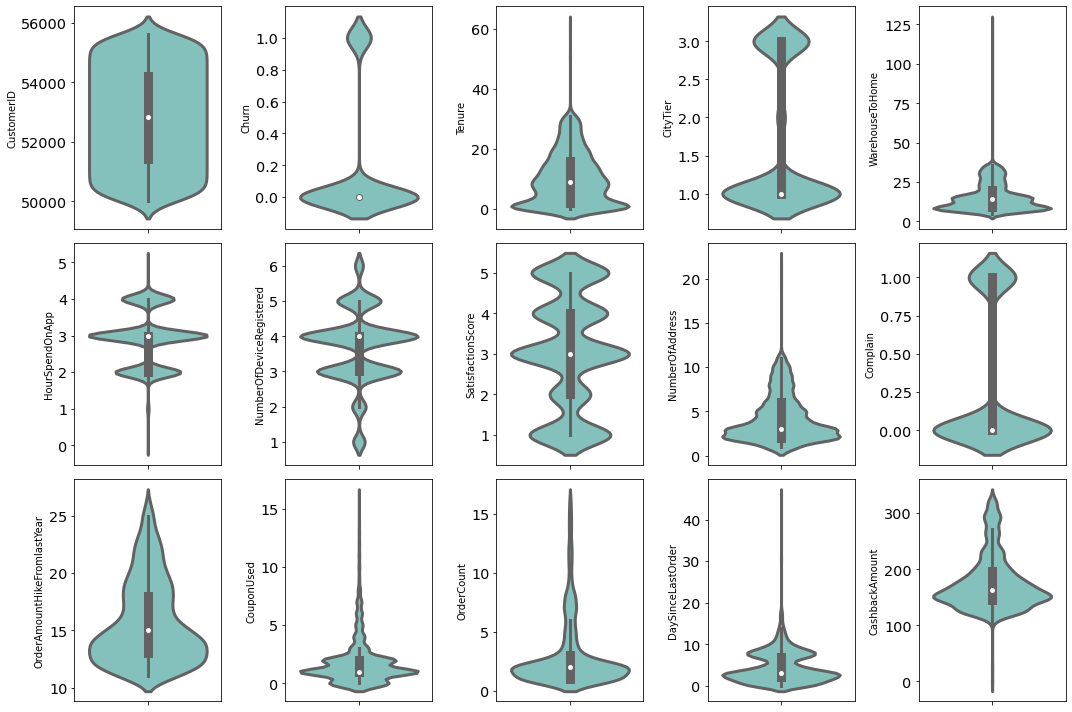

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[numerical[i]], palette='GnBu')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

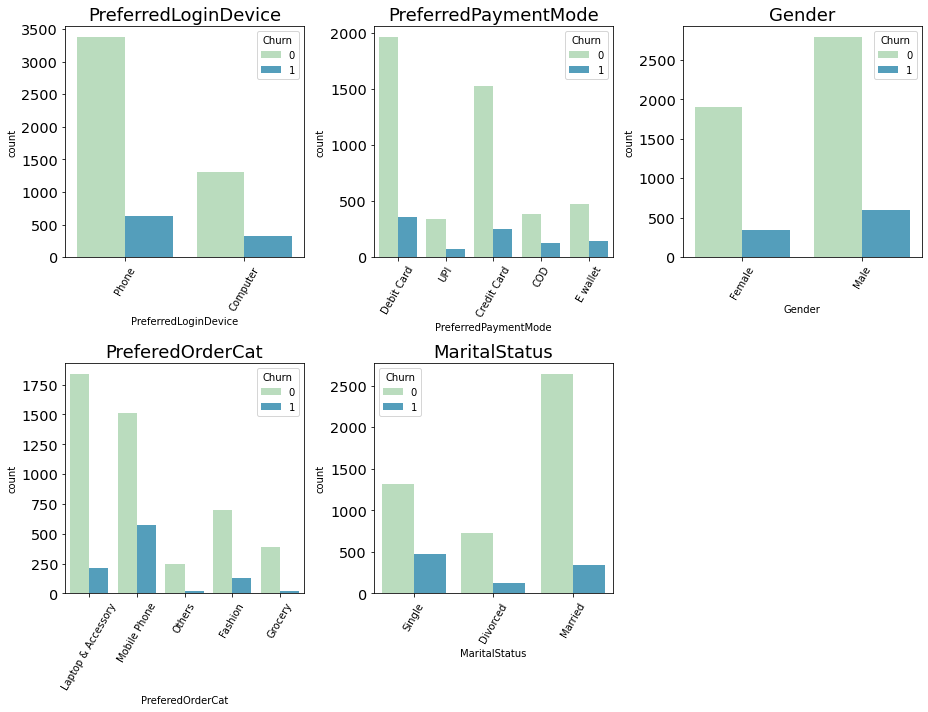

In [ ]:
fig = plt.figure(figsize=(13,10))
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation=60, fontsize=10)
    plt.title(categorical[i],fontsize=18)
    sns.countplot(df[categorical[i]], hue=target, palette='GnBu', orient='h')
    plt.tight_layout(pad=8)

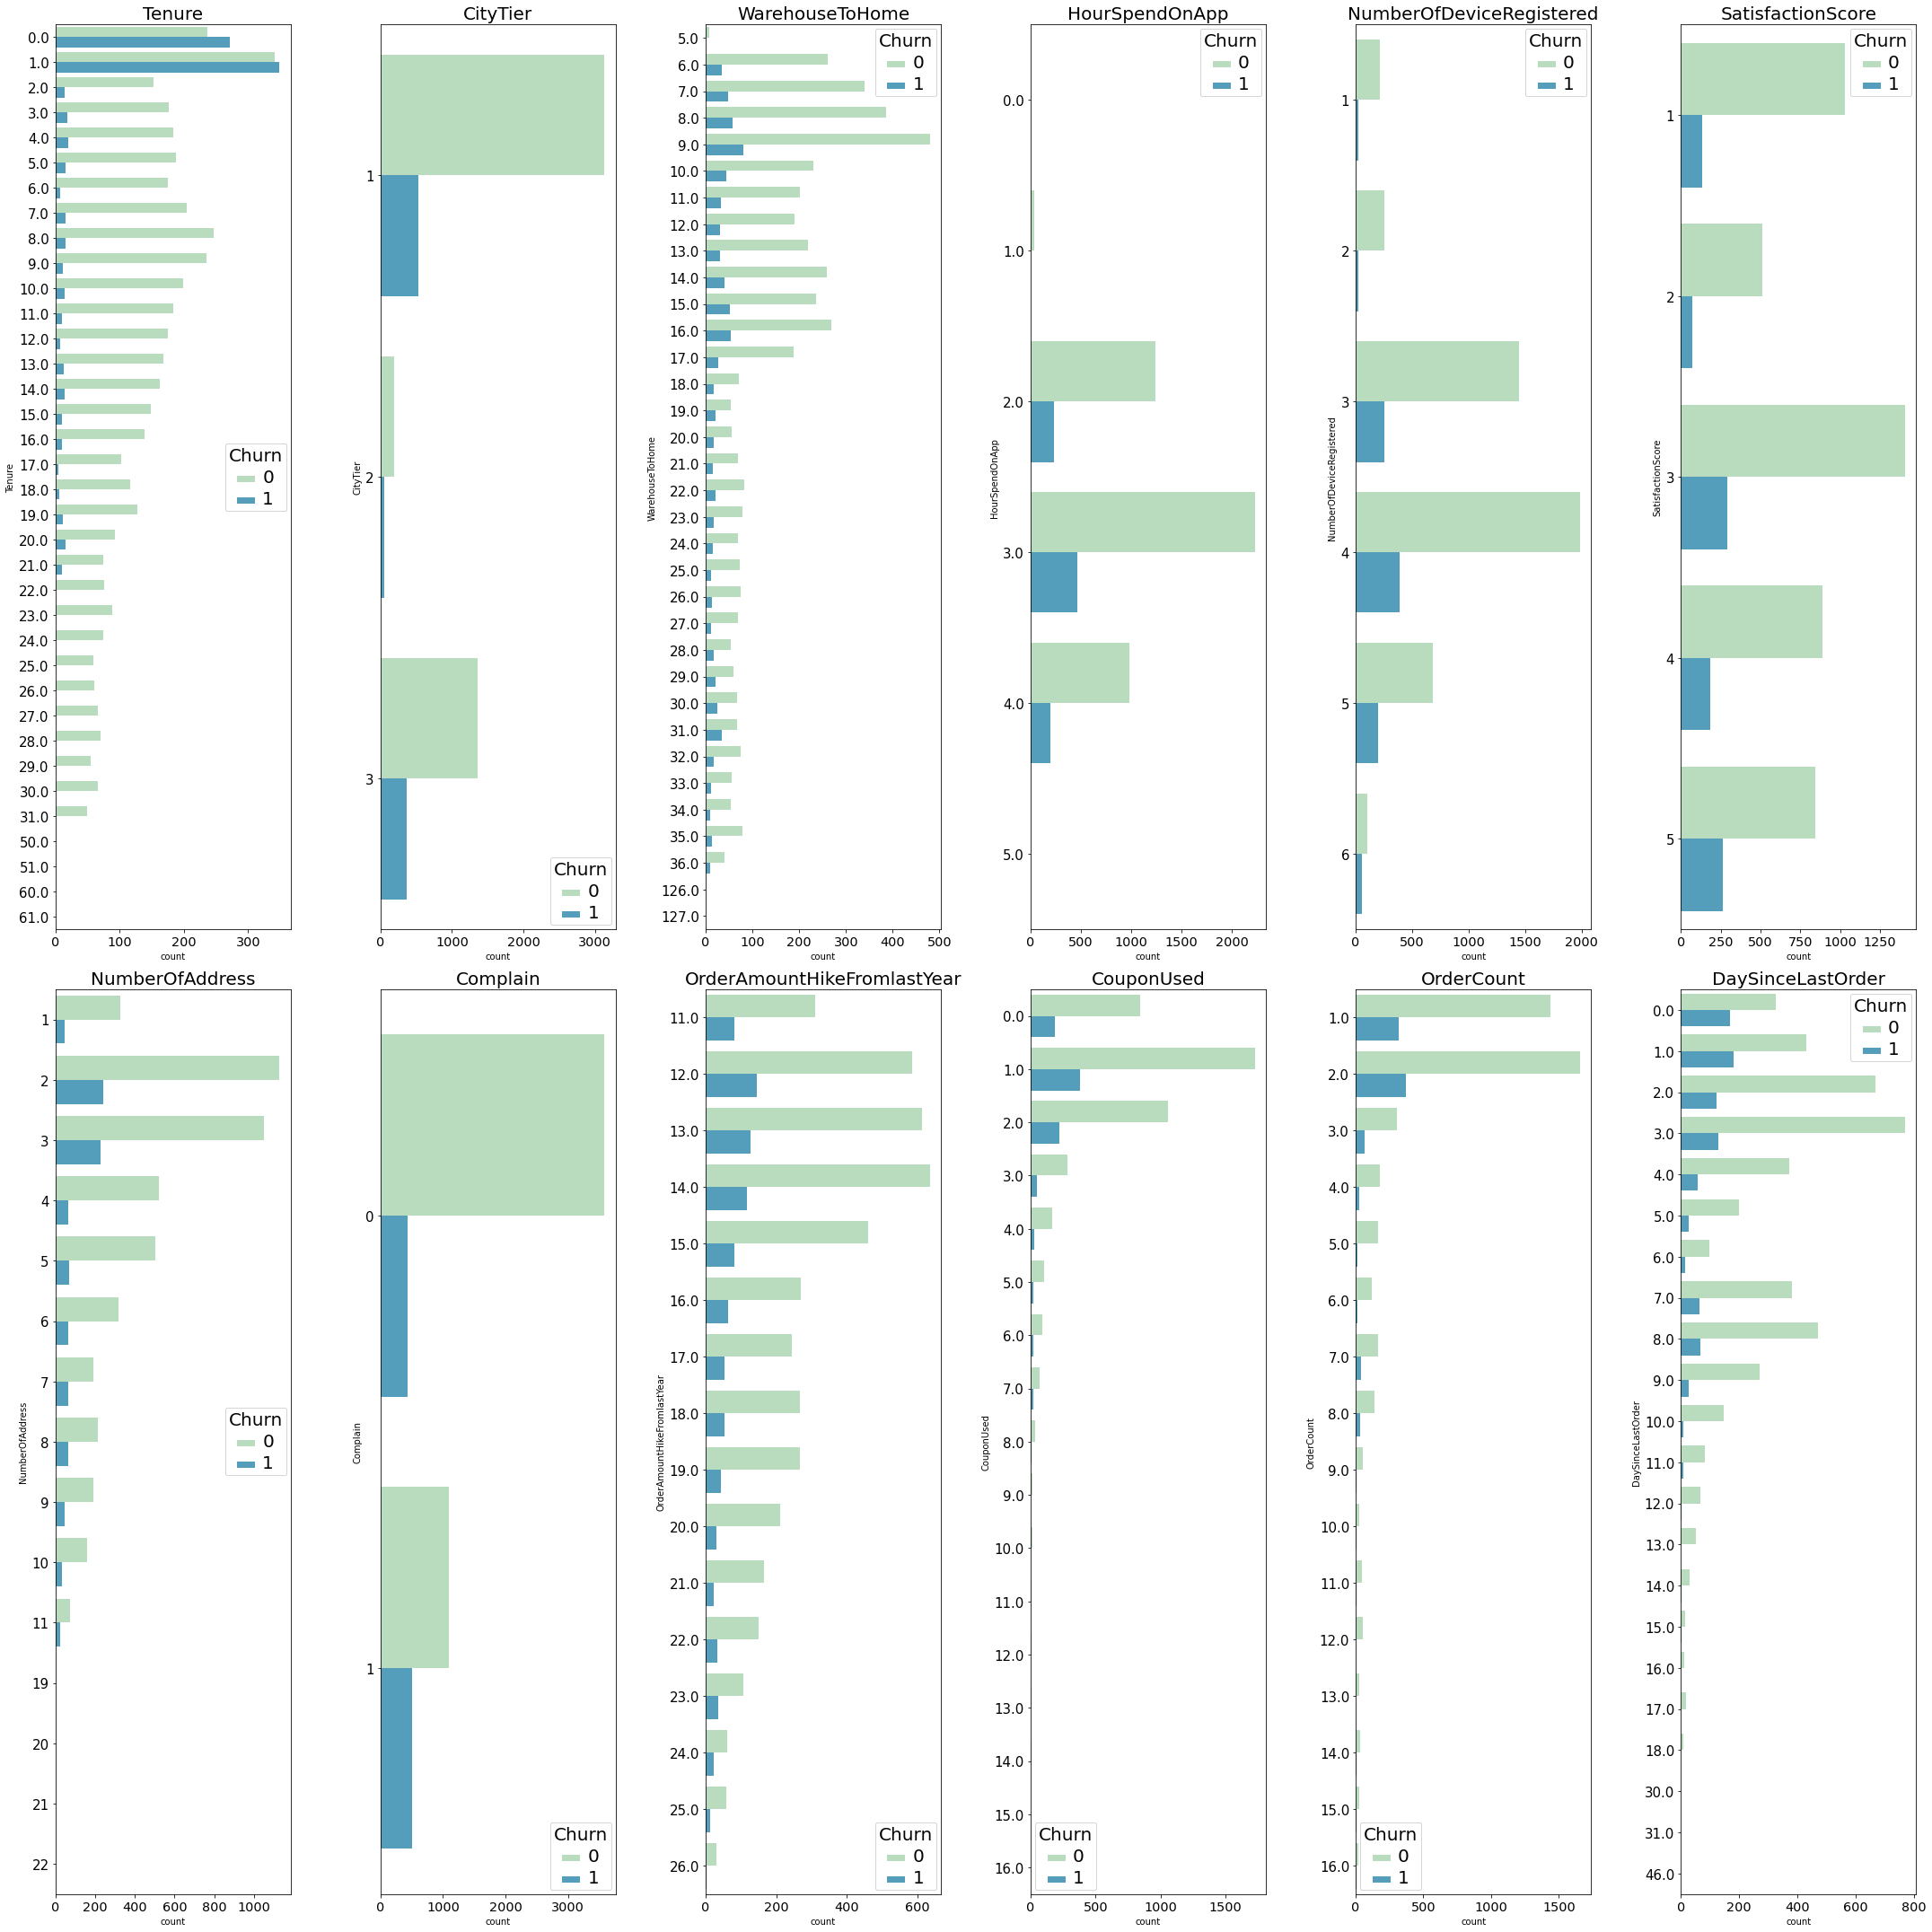

In [ ]:
nums0= df[numerical]
#drop karena jumlah unique terlalu banyak
nums1 = nums0.drop(['Churn','CustomerID','CashbackAmount'], axis=1)

# nums1=df[numerical]
fig = plt.figure(figsize=(30,30))
for index, col in enumerate(nums1):
    ax=fig.add_subplot(2, 6, index+1)
    ax.set_title(col,fontsize=20)
    plt.yticks(fontsize=15)
    f= sns.countplot(y=df[col], hue=target, ax=ax, palette="GnBu")
    plt.setp(f.get_legend().get_texts(), fontsize='20')
    plt.setp(f.get_legend().get_title(), fontsize='20')
plt.tight_layout(pad=8);

## Insight Univariate Analysis
1) Boxplot
- WarehouseToHome ada outlier satu yang sangat jauh/ekstrem
- CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount memiliki banyak outlier

2) Kdeplot
- **positive skewed (right)**: Tenure, WarehouseToHome, NumerOfAddress, OrderAmountHikeFromlastYear, CouponUsed, DaySinceLastOrder, OrderCount, CashbackAmount
- **bimodal**: Churn, Complain
- **multimodal**: CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore
- **Unimodal/Simetris**: Churn

3) Countplot

(a) Churn pada Data Categorical
- **PreferredLoginDevice** : pelanggan yang churn mayoritas login melalui **phone** 
- **PreferredPaymentMode** : pelanggan yang melakukan churn paling banyak melakukan pembayaran melalui **debit card**
- **Gender** : pelanggan churn paling banyak dilakukan oleh **laki-laki (male)**
- **PreferedOrderCat** : churn paling banyak dilakukan oleh pelanggan yang membeli **mobile phone**
- **MaritalStatus** : mayoritas pelanggan yang churn berstatus **single**

(b) Churn pada Data Numerical
- **Tenure** : pelanggan yang mayoritas churn memiliki tenure selama **1** (kurang tahu satuannya)
- **CityTier** : pelanggan yang churn paling banyak berada kota tingkat **1**
- **WarehouseToHome** : churn banyak dilakukan oleh pelanggan yang jarak rumahnya dengan gudang sekitar **9** (kilometer)
- **HourSpendOnApp** : pelanggan yang paling banyak churn adalah pelanggan yang menghabiskan waktu sekitar **3 jam** pada mobile phone atau website
- **NumberOfDeviceRegistered** : Jumlah device yang paling banyak terdaftar pada pelanggan yang melakukan churn adalah **4**
- **SatisfactionScore** : Skor kepuasan yang paling banyak diberikan oleh pelanggan yang melakukan churn adalah **3**
- **NumberOfAddress** : jumlah alamat yang paling banyak ditambahkan oleh pelanggan yang melakukan churn yaitu **2**
- **Complain** : dalam sebulan terakhir pelanggan yang melakukan churn banyak **melakukan komplain**
- **OrderAmountHikeFromlastYear** : dalam setahun terakhir, pelanggan yang churn mayoritas terdapat peningkatan persentase order sebesar **12%**
- **CouponUsed** : dalam sebulan terakhir, pelanggan yang churn mayoritas menggunakan kupon sebanyak **1**
- **OrderCount** : dalam sebulan terakhir, pelanggan yang churn mayoritas melakukan order sebanyak **2** kali
- **DaySinceLastOrder** : mayoritas rata2 hari customer melakukan churn sejak terakhir order yaitu **0** dan **1** hari

### Rencana Pre-Processing
1. **Handling missing values with imputation (numeric)**: 
- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median


2. **Handling an outliers**
- Using Z score to all positively skewed distribution 


3. **Feature Transformation**
- Using Log Transformation to all positively skewed distribution


4. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding


5. **Class Imbalance**
 Apakah frekuensi dari nilai yang paling umum timpang?
- PreferredLoginDevice, top frequency mobile phone = 70,97%    ==========> Undersampling
- PreferredPaymentMode, top frequency Debit Card = 41%        
- Gender, top frequency Gender = 60%                          ============> Undersampling
- PreferedOrderCat, top frequency mobile phone = 36,94 %
- MaritalStatus, top frequency Married = 53,30 %              ============> Undersampling

# Multivariate Analysis

In [ ]:
df.drop('CustomerID', axis=1).corr()

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.349408  0.084703         0.076630   
Tenure                      -0.349408  1.000000 -0.060688        -0.018218   
CityTier                     0.084703 -0.060688  1.000000         0.010624   
WarehouseToHome              0.076630 -0.018218  0.010624         1.000000   
HourSpendOnApp               0.018675 -0.021226 -0.009150         0.060990   
NumberOfDeviceRegistered     0.107939 -0.023983  0.027934         0.019071   
SatisfactionScore            0.105481 -0.013903 -0.011554         0.007722   
NumberOfAddress              0.043931  0.237666 -0.029440        -0.011020   
Complain                     0.250188 -0.021268  0.003375         0.028696   
OrderAmountHikeFromlastYear -0.010058  0.005825 -0.031408         0.038795   
CouponUsed                  -0.008264  0.129035  0.021456        -0.003935   
OrderCount                  -0.028697  0.186403  0.033388         0.002681   
DaySinceLastOrder           -0.160757  0.184552  0.017525         0.017829   
CashbackAmount              -0.154118  0.476380  0.055746        -0.009200   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                              0.018675                  0.107939   
Tenure                            -0.021226                 -0.023983   
CityTier                          -0.009150                  0.027934   
WarehouseToHome                    0.060990                  0.019071   
HourSpendOnApp                     1.000000                  0.316800   
NumberOfDeviceRegistered           0.316800                  1.000000   
SatisfactionScore                  0.031858                 -0.017228   
NumberOfAddress                    0.145126                  0.084997   
Complain                           0.006976                  0.003407   
OrderAmountHikeFromlastYear        0.106843                  0.069475   
CouponUsed                         0.191528                  0.151685   
OrderCount                         0.109575                  0.103464   
DaySinceLastOrder                  0.075716                  0.018208   
CashbackAmount                     0.121490                  0.137183   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.105481         0.043931  0.250188   
Tenure                               -0.013903         0.237666 -0.021268   
CityTier                             -0.011554        -0.029440  0.003375   
WarehouseToHome                       0.007722        -0.011020  0.028696   
HourSpendOnApp                        0.031858         0.145126  0.006976   
NumberOfDeviceRegistered             -0.017228         0.084997  0.003407   
SatisfactionScore                     1.000000         0.053583 -0.031115   
NumberOfAddress                       0.053583         1.000000 -0.026399   
Complain                             -0.031115        -0.026399  1.000000   
OrderAmountHikeFromlastYear          -0.027730         0.015533 -0.004529   
CouponUsed                            0.017936         0.042120 -0.008174   
OrderCount                            0.019764        -0.007609 -0.019307   
DaySinceLastOrder                     0.032082        -0.064847 -0.043546   
CashbackAmount                        0.003473         0.186688  0.000525   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Churn                                          -0.010058   -0.008264   
Tenure                                          0.005825    0.129035   
CityTier                                       -0.031408    0.021456   
WarehouseToHome                                 0.038795   -0.003935   
HourSpendOnApp                                  0.106843    0.191528   
NumberOfDeviceRegistered                        0.069475    0.151685   
SatisfactionScore                              -0.027730    0.017936   
NumberOfAddress                  

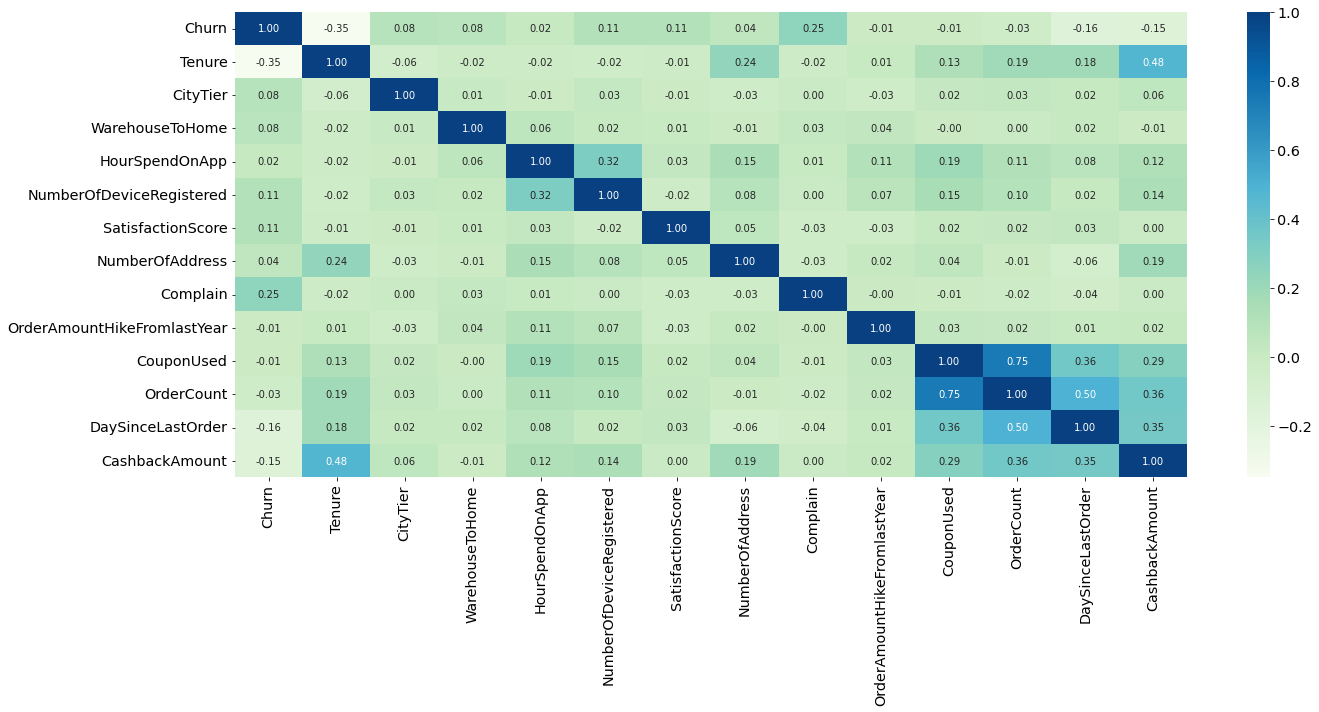

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

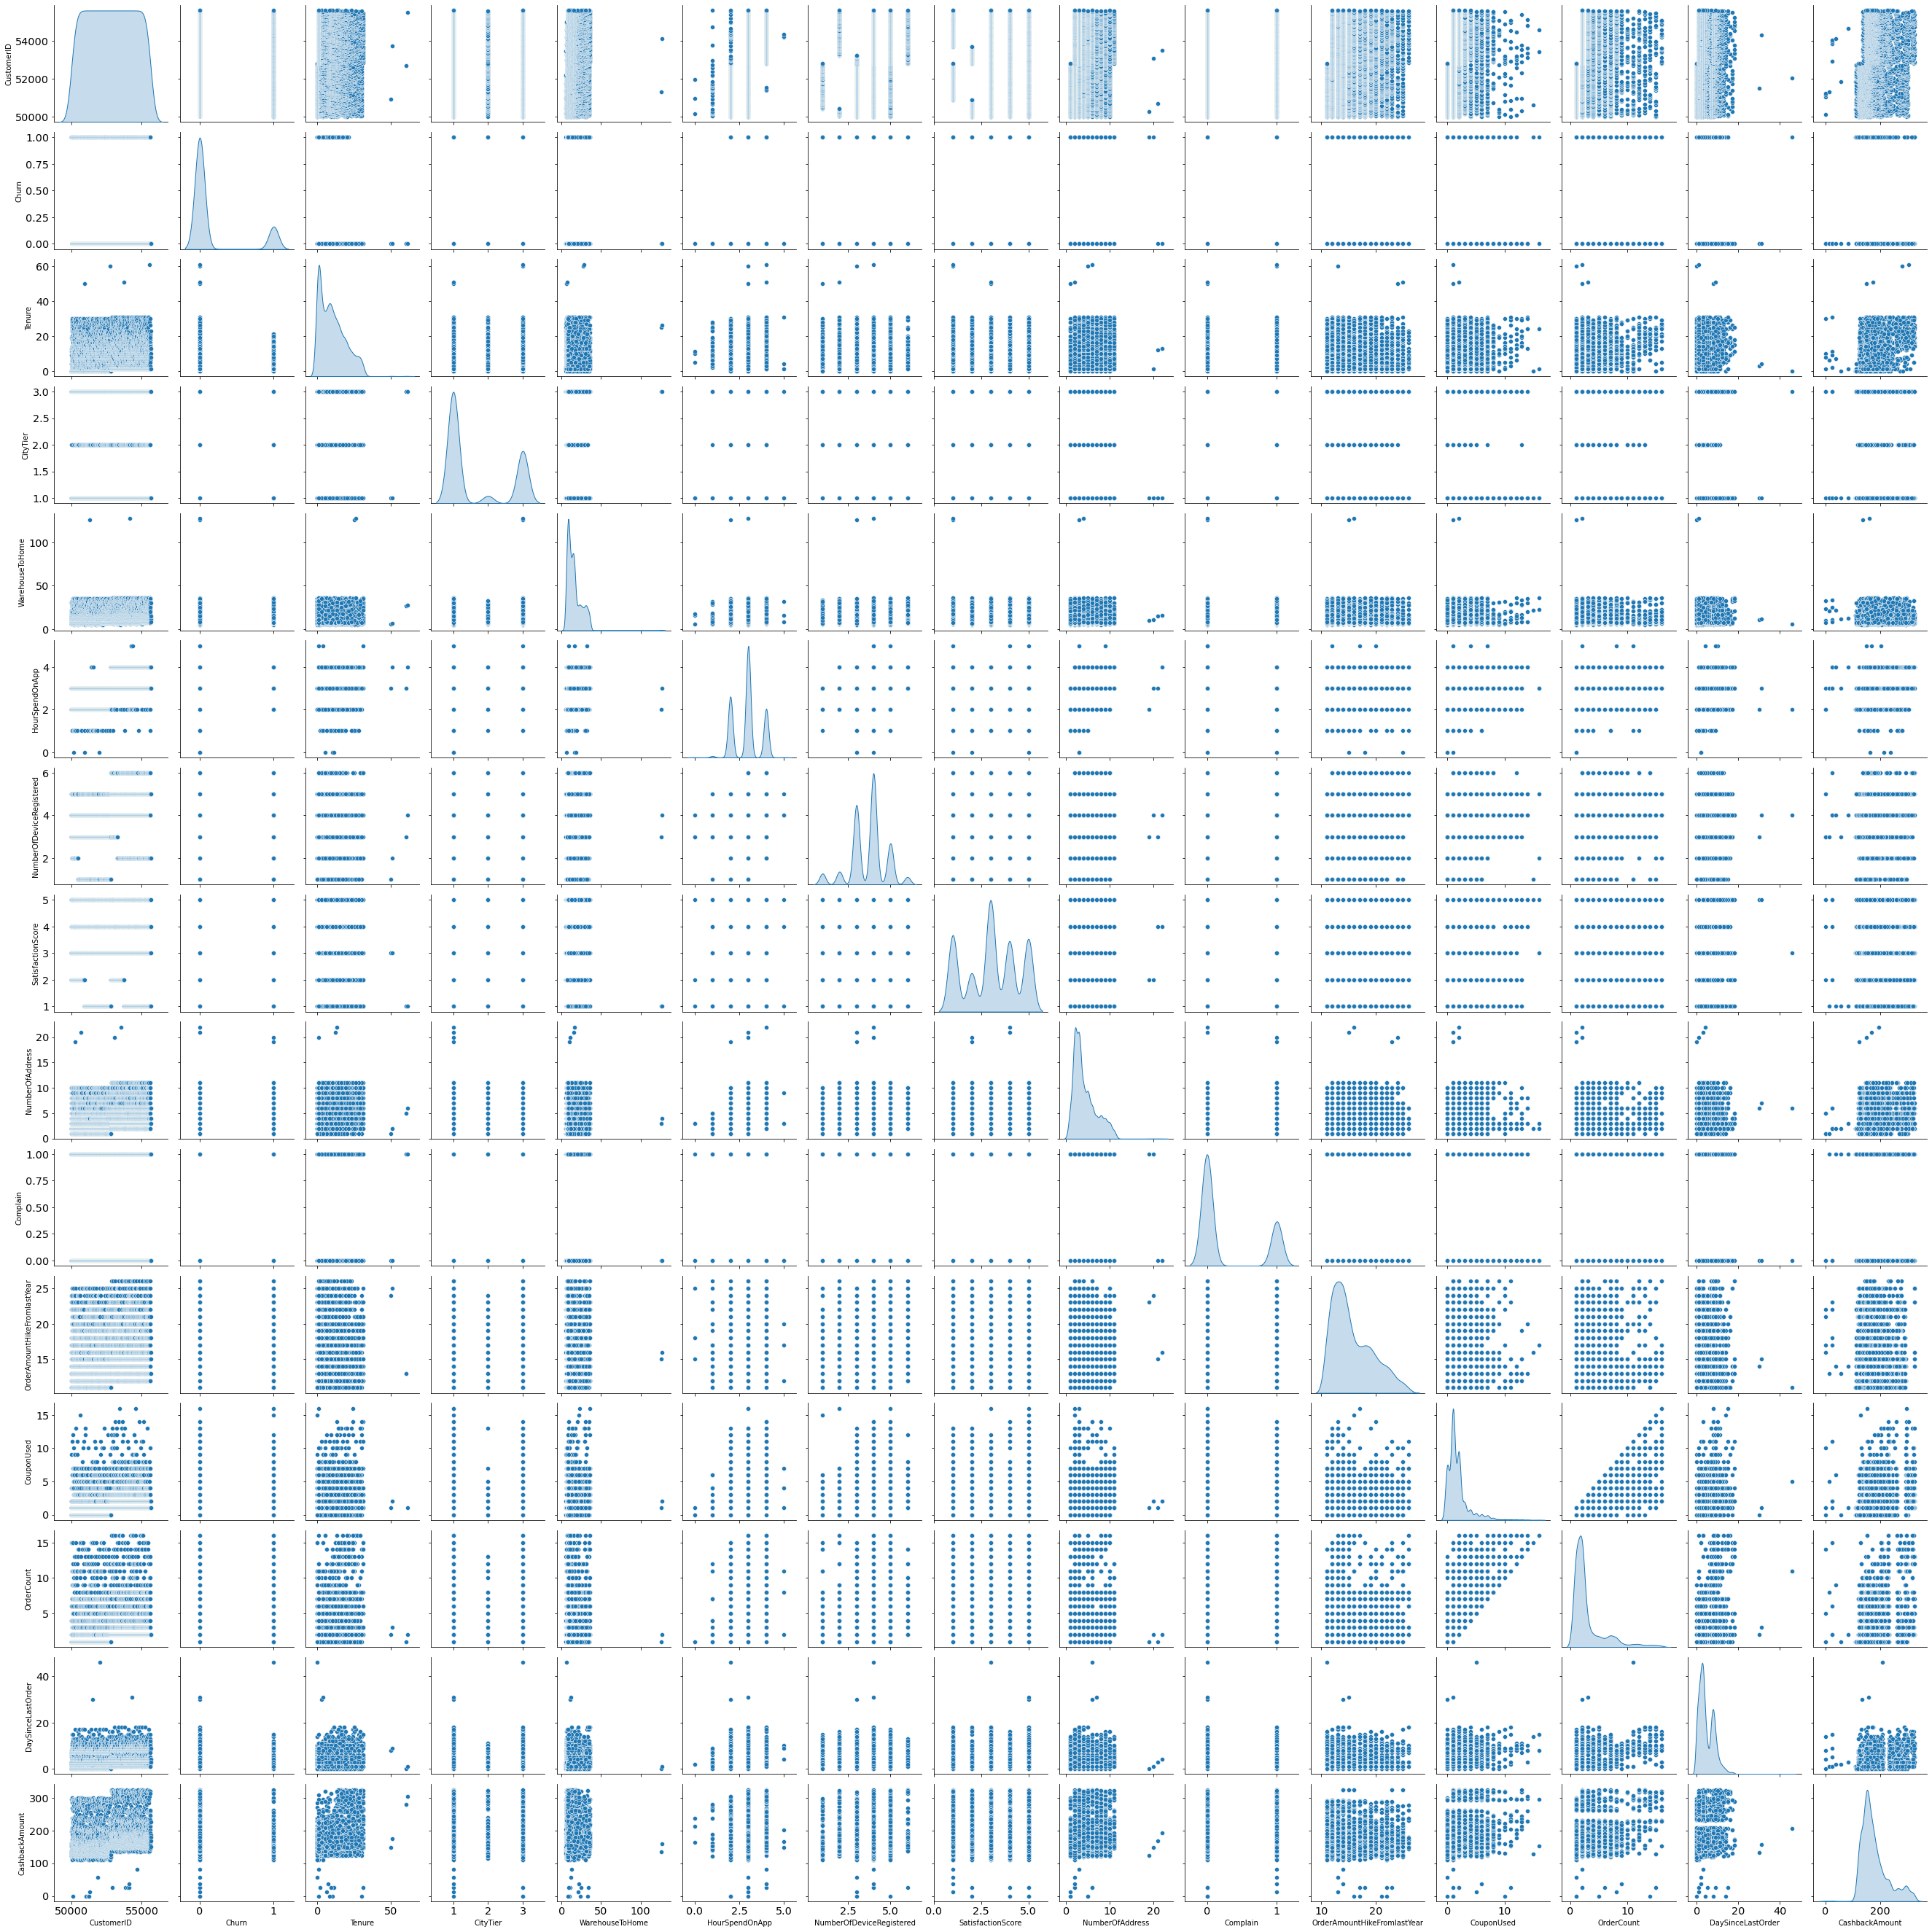

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', palette='GnBu')

## Insight Multivariate Analysis

1) Pada **Churn** ditemukan korelasi sebagai berikut:

- korelasi **churn** dengan **tenure** sebesar -0,35 yang artinya **semakin tinggi tenure makan kemungkinan pelanggan untuk churn semakin rendah, sebaliknya semakin kecil tenure maka kemungkinan pelanggan churn semakin tinggi**
- korelasi antara **churn** dengan **complain** sebesar 0,25, artinya **semakin banyak pelanggan melakukan komplain maka kemungkinan pelanggan churn juga semakin tinggi**
- hasil korelasi tersebut mendukung data countplot sebelumnya

2) Terdapat korelasi antara **tenure**  dengan **CashbackAmount** yaitu sebesar 0,48 artinya **jika dalam sebulan terakhir pelanggan semakin banyak mendapatkan cashback maka tenure-nya akan semakin tinggi**

# BUSINESS INSIGHT

1) **Churn, Tenure, dan CashbackAmount**

In [ ]:
def show_values(axis, orientation="vertical", space=.01):
    def show(ax):
        if orientation == "vertical":
            for p in ax.patches:
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(x, y, value, ha="center") 
        elif orientation == "horizontal":
            for p in ax.patches:
                x = p.get_x() + p.get_width() + float(space)
                y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(x, y, value, ha="left")

    if isinstance(axis, np.ndarray):
        for idx, ax in np.ndenumerate(axis):
            show(axis)
    else:
        show(axis)

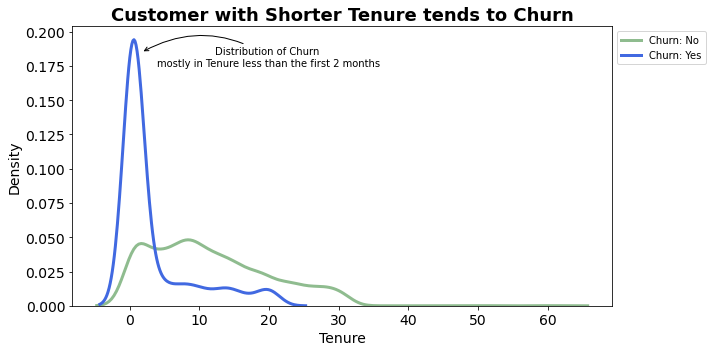

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'darkseagreen', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'royalblue', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Distribution of Churn \nmostly in Tenure less than the first 2 months', 
            xy=(1.75, 0.185), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

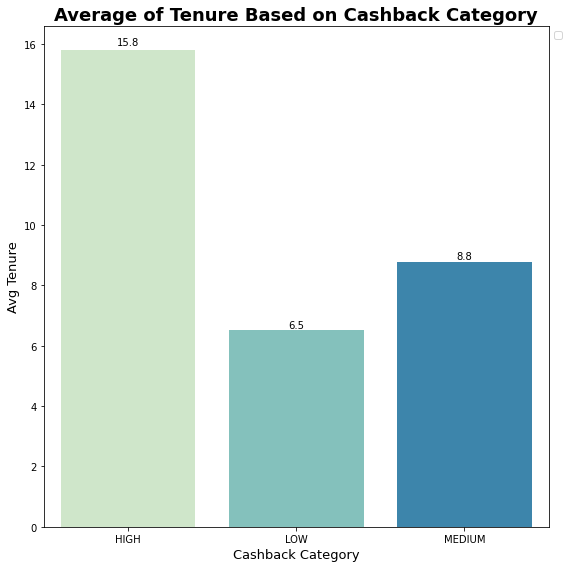

In [ ]:
#melakukan kategorisasi cashback amount
df0=df['CashbackAmount'].reset_index()
Q1 = df0['CashbackAmount'].quantile(0.25)
Q3 = df0['CashbackAmount'].quantile(0.75)

df0['CashCat']=np.where(df0['CashbackAmount']<Q1,'LOW',
                        np.where(df0['CashbackAmount'] <= Q3, 'MEDIUM', 'HIGH'))

#join kolom
df1 = df[['CustomerID','Churn','Tenure','CashbackAmount']]
df2 = df1.join(df0.set_index('CashbackAmount'), on='CashbackAmount').reset_index()
df3 = df2.groupby(['CashCat']).agg({'Tenure':'mean','CustomerID':'nunique'}).reset_index()
df3.columns= ['CashCat','AvgTenure','TotalCust']
df3

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df3, x='CashCat', y='AvgTenure', palette='GnBu')
plt.title('Average of Tenure Based on Cashback Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Cashback Category',fontsize=13);
plt.ylabel('Avg Tenure',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

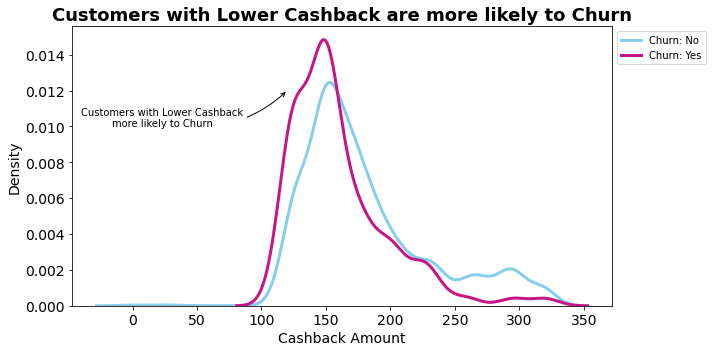

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['CashbackAmount'].dropna(), color= 'skyblue', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['CashbackAmount'].dropna(), color= 'mediumvioletred', label= 'Churn: Yes', ax=ax)

ax.set_title('Customers with Lower Cashback are more likely to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cashback Amount', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Customers with Lower Cashback\nmore likely to Churn', 
            xy=(120, 0.012), xytext=(23, 0.01), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

**Insight**:
Pelanggan dengan tenure rendah cenderung mendapatkan cashback yang tergolong sedikit dan memiliki potensi untuk melakukan churn

**Business Recommendation**: Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.

- **Churn, Complain, dan PreferredOrderCat**

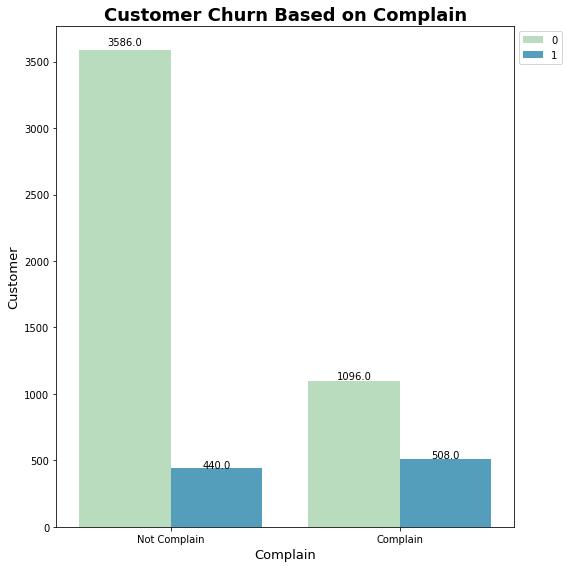

In [ ]:
dfchurncomplain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfchurncomplain['Complain'] = dfchurncomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfchurncomplain, x='Complain', y='CustomerID', hue='Churn', palette='GnBu')
plt.title('Customer Churn Based on Complain', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Complain',fontsize=13);
plt.ylabel('Customer',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [ ]:
dfcategory0=df.groupby(['PreferedOrderCat','Churn', 'Complain',]).agg({'CustomerID':'count'}).reset_index()
dfcategory0['Complain'] = dfcategory0['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcategory0

PreferedOrderCat  Churn      Complain  CustomerID
0              Fashion      0  Not Complain         508
1              Fashion      0      Complain         190
2              Fashion      1  Not Complain          76
3              Fashion      1      Complain          52
4              Grocery      0  Not Complain         276
5              Grocery      0      Complain         114
6              Grocery      1  Not Complain           8
7              Grocery      1      Complain          12
8   Laptop & Accessory      0  Not Complain        1386
9   Laptop & Accessory      0      Complain         454
10  Laptop & Accessory      1  Not Complain         106
11  Laptop & Accessory      1      Complain         104
12        Mobile Phone      0  Not Complain        1228
13        Mobile Phone      0      Complain         282
14        Mobile Phone      1  Not Complain         242
15        Mobile Phone      1      Complain         328
16              Others      0  Not Complain         188
17              Others      0      Complain          56
18              Others      1  Not Complain           8
19              Others      1      Complain          12

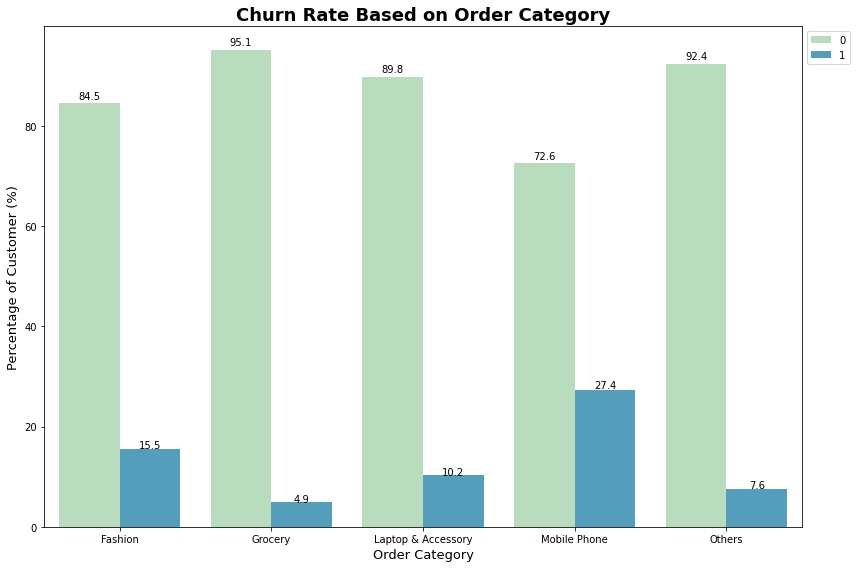

In [ ]:
dfcategory=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='PreferedOrderCat')

dfcategory2.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcategory2, x='PreferedOrderCat', y='Ratio', hue='Churn', palette='GnBu')
plt.title('Churn Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

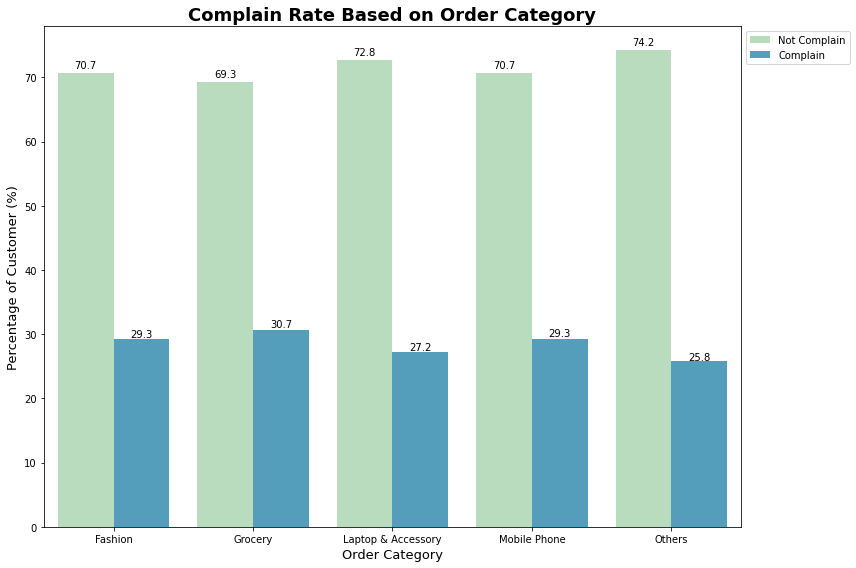

In [ ]:
dfcomplain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain['Complain'] = dfcomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcomplain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain3 = dfcomplain.merge(dfcomplain2, how='left',
              on='PreferedOrderCat')

dfcomplain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
dfcomplain3['Ratio'] = (dfcomplain3['Num_Customer'] / dfcomplain3['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcomplain3, x='PreferedOrderCat', y='Ratio', hue='Complain', palette='GnBu')
plt.title('Complain Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**Insight**: 
- Pelanggan yang melakukan churn karena komplain lebih tinggi dibanding yang tidak komplain dan mayoritas membeli mobile phone
- Komplain paling banyak dilakukan oleh pelanggan membeli grocery atau kebutuhan sehari-hari, lalu disusul mobile phone dan fashion

**Business Recommendation**:
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas

# Pre-Processing
1. **Handling missing values with imputation (numeric)**: 
- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median


2. **Handling an outliers**
- Using Z score to all positively skewed distribution 


3. **Feature Transformation**
- Using Log Transformation to all positively skewed distribution


4. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding


5. **Class Imbalance** 
<br> Apakah frekuensi masing-masing nilai pada target timpang?
<br> 0 : 4882
<br> 1 : 948
<br> Persentase ketimpangan 16.838 %
<br> Berdasarakan https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data ada tiga tingkat ketimpangan yaitu mild, moderate dan extreme. Data ini tergolong pada tingkat ketimpangan moderate.

# 1. **Handling missing values with imputation (numeric)**:

- Tenure = 4,9% =========================> median
- WareHouseToHome = 4,7% ================> median
- HourSpendOnApp = 4,7%  ================> mean
- OrderAmountHikeFromlastYear = 4,9%   ====> median
- CouponUsed = 4,8%  ====================> median
- OrderCount = 4,8%  ====================> median
- DaySinceLastOrder = 5,8%  =============> median

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## 1.1. Tenure

In [ ]:


df = df.sort_values(['CashbackAmount','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed'])
dp = df.copy()
dp = dp.sort_values(['CashbackAmount','NumberOfAddress'])
dp['Tenure'].fillna(method='ffill', inplace=True)
dp.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1026       51027      0     1.0                Phone         1   
1255       51256      0     8.0                Phone         3   
101        50102      0    10.0             Computer         3   
1176       51177      0    30.0             Computer         3   
1300       51301      0     6.0                Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1026             33.0          Credit Card  Female             2.0   
1255             24.0          Credit Card    Male             3.0   
101              10.0             E wallet    Male             2.0   
1176              8.0          Credit Card    Male             2.0   
1300             21.0          Credit Card  Female             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
1026                         5  Laptop & Accessory                  5   
1255                         3  Laptop & Accessory                  5   
101                          3        Mobile Phone                  2   
1176                         3             Grocery                  4   
1300                         3  Laptop & Accessory                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1026       Married                1         0                         21.0   
1255       Married                1         0                         16.0   
101        Married                5         0                         17.0   
1176       Married                5         0                         22.0   
1300       Married                1         1                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1026         1.0         1.0                0.0             0.0  
1255         0.0         1.0                4.0             0.0  
101          1.0         5.0                8.0             0.0  
1176        10.0        14.0               14.0             0.0  
1300         5.0         8.0                1.0            12.0

## 1.2. WareHouseToHome

In [ ]:
dp['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

## 1.3. HourSpendOnApp

In [ ]:
gender = df['Gender'].value_counts().index
maritalstatus = df['MaritalStatus'].value_counts().index
PreferredLoginDevice = df['PreferredLoginDevice'].value_counts().index
x = []
nan = np.nan
for index, kolom in df.iterrows():
    if kolom['HourSpendOnApp'] > 0:
        b = kolom['HourSpendOnApp']
        x.append(b)
    else:
        for i in gender:
            for j in maritalstatus:
                for k in PreferredLoginDevice:
                    if (kolom['Gender'] == i) & (kolom['MaritalStatus'] == j) & (kolom['PreferredLoginDevice'] == k):
                        b = df['HourSpendOnApp'][(df['Gender'] == i) & (df['MaritalStatus'] == j) & (df['PreferredLoginDevice'] == k)].median()
                        x.append(b)
dp['HourSpendOnApp'] = x

## 1.4. OrderAmountHikeFromlastYear

In [ ]:
dp['OrderAmountHikeFromlastYear'].fillna(dp['OrderAmountHikeFromlastYear'].median(), inplace=True)

## 1.5. CouponUsed

In [ ]:
b = []
for index, kolom in dp.iterrows():
    if kolom['CouponUsed'] >= 0:
        a=kolom['CouponUsed']
        b.append(a)
    else:
        a=kolom['OrderCount']
        b.append(a)


dp['CouponUsed']=b

## 1.6. OrderCount

In [ ]:
dp = dp.sort_values(['CouponUsed','DaySinceLastOrder','CashbackAmount','OrderCount'])
dp['OrderCount'].fillna(method='ffill',inplace=True)
# pd.options.display.min_rows = 5630
# pd.options.display.max_rows = 5630
# dp.head(5630) 

## 1.7. DaySinceLastOrder

In [ ]:
dp = dp.sort_values(['OrderCount','CouponUsed','CashbackAmount','Tenure']) #GASS
dp['DaySinceLastOrder'].fillna(method='ffill',inplace=True)

In [ ]:
dp.sort_values('WarehouseToHome').tail(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
5484       55485      0     3.0                Phone         1   
5233       55234      0     2.0                Phone         1   
2894       52895      1     2.0                Phone         1   
1309       51310      0    25.0             Computer         3   
4124       54125      0    26.0             Computer         3   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
5484             36.0           Debit Card   Male             4.0   
5233             36.0           Debit Card   Male             4.0   
2894             36.0          Credit Card   Male             4.0   
1309            126.0           Debit Card   Male             2.0   
4124            127.0           Debit Card   Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
5484                         6  Laptop & Accessory                  3   
5233                         6  Laptop & Accessory                  4   
2894                         4  Laptop & Accessory                  5   
1309                         3        Mobile Phone                  1   
4124                         4        Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
5484       Married               10         0                         18.0   
5233       Married                3         0                         15.0   
2894      Divorced                9         1                         20.0   
1309       Married                3         0                         15.0   
4124       Married                4         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
5484         1.0         2.0                7.0          188.84  
5233         1.0         2.0                8.0          190.49  
2894         1.0         2.0                1.0          191.73  
1309         1.0         1.0                0.0          134.82  
4124         2.0         2.0                1.0          159.82

In [ ]:
#karena data sudah terisi semua maka beberapa tipe data baru dapat diubah
dp = dp.astype({"Tenure":'int64',"WarehouseToHome":'int64',"HourSpendOnApp":'int64',
                   "OrderAmountHikeFromlastYear":'int64',"CouponUsed":'int64',
                   "OrderCount":'int64',"DaySinceLastOrder":'int64'
                   })

# 2. Feature Selection & Extraction
- Using DaySinceLastOrder or WeekSinceLastOrder
- Drop OrderCount
- New Features: WeekSinceLastOrder, OrderMean, CashbackRate

## 2.1. WeekSinceLastOrder

In [ ]:
b = []
for index,kolom in dp.iterrows():
    if (kolom['DaySinceLastOrder'] >= 0) & (kolom['DaySinceLastOrder'] <=7):
        a = 1
        b.append(a)
    elif (kolom['DaySinceLastOrder'] > 7) & (kolom['DaySinceLastOrder'] <=14):
        a = 2
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >14) & (kolom['DaySinceLastOrder'] <=21):
        a = 3
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >21) & (kolom['DaySinceLastOrder'] <=28):
        a = 4
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >28) & (kolom['DaySinceLastOrder'] <=35):
        a = 5
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >35) & (kolom['DaySinceLastOrder'] <=42):
        a = 6
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >42) & (kolom['DaySinceLastOrder'] <=49):
        a = 7
        b.append(a)
    else:
        a = np.nan
        b.append(a)
dp['WeekSinceLastOrder'] = b

b = []
for index,kolom in df.iterrows():
    if (kolom['DaySinceLastOrder'] >= 0) & (kolom['DaySinceLastOrder'] <=7):
        a = 1
        b.append(a)
    elif (kolom['DaySinceLastOrder'] > 7) & (kolom['DaySinceLastOrder'] <=14):
        a = 2
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >14) & (kolom['DaySinceLastOrder'] <=21):
        a = 3
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >21) & (kolom['DaySinceLastOrder'] <=28):
        a = 4
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >28) & (kolom['DaySinceLastOrder'] <=35):
        a = 5
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >35) & (kolom['DaySinceLastOrder'] <=42):
        a = 6
        b.append(a)
    elif (kolom['DaySinceLastOrder'] >42) & (kolom['DaySinceLastOrder'] <=49):
        a = 7
        b.append(a)
    else:
        a = np.nan
        b.append(a)
df['WeekSinceLastOrder'] = b

## 2.2. OrderMean

In [ ]:
dp['OrderMean'] = dp['OrderCount']/dp['NumberOfAddress']
df['OrderMean'] = df['OrderCount']/df['NumberOfAddress']

## 2.3. CashbackRate

In [ ]:
dp['CashbackRate'] = dp['CashbackAmount']/dp['OrderCount']
df['CashbackRate'] = df['CashbackAmount']/df['OrderCount']

Text(0.5, 1.0, 'Before Fillna')

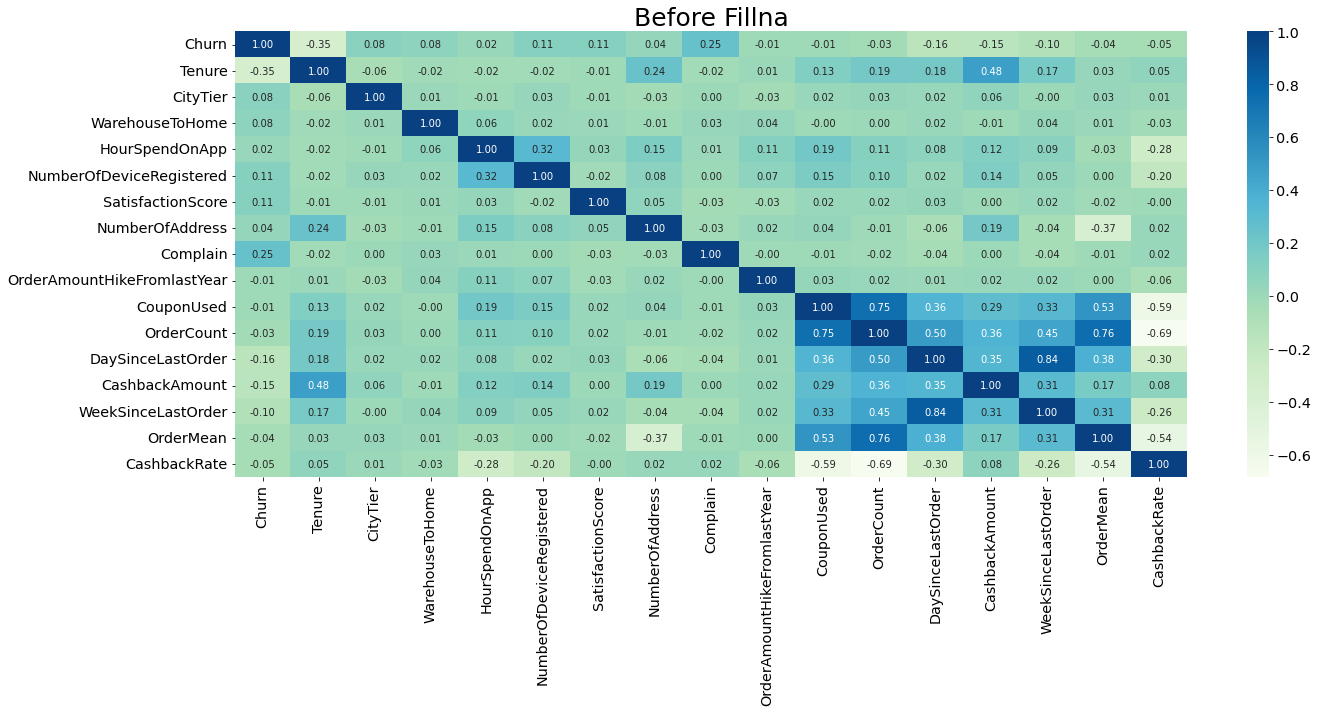

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f') # nan
plt.title('Before Fillna', fontsize=25)

Text(0.5, 1.0, 'After Fillna')

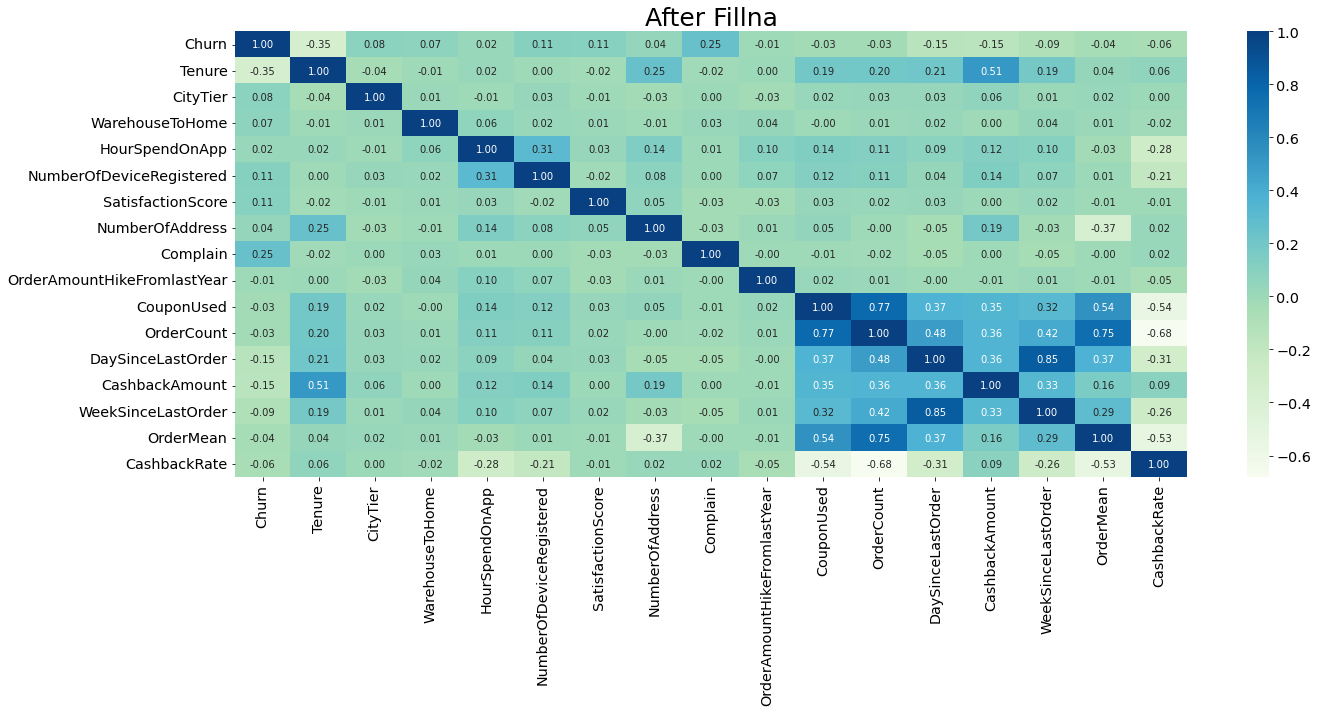

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(dp.drop('CustomerID', axis=1).corr(), cmap='GnBu', annot=True, fmt='.2f') #non nan
plt.title('After Fillna', fontsize=25)

In [ ]:
dp.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
WeekSinceLastOrder             0
OrderMean                      0
CashbackRate                   0
dtype: int64

In [ ]:
dp_mishandling = dp.copy()

In [ ]:
dp_mishandling.drop('OrderCount',axis = 1, inplace=True)
dp_days= dp_mishandling.copy()
dp_weeks= dp_mishandling.copy()
dp_days.drop('WeekSinceLastOrder',axis = 1, inplace=True)
dp_weeks.drop('DaySinceLastOrder', axis= 1, inplace=True)


In [ ]:
dp_weeks.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount',
       'WeekSinceLastOrder', 'OrderMean', 'CashbackRate'],
      dtype='object')

Text(0.5, 1.0, 'Before Fillna')

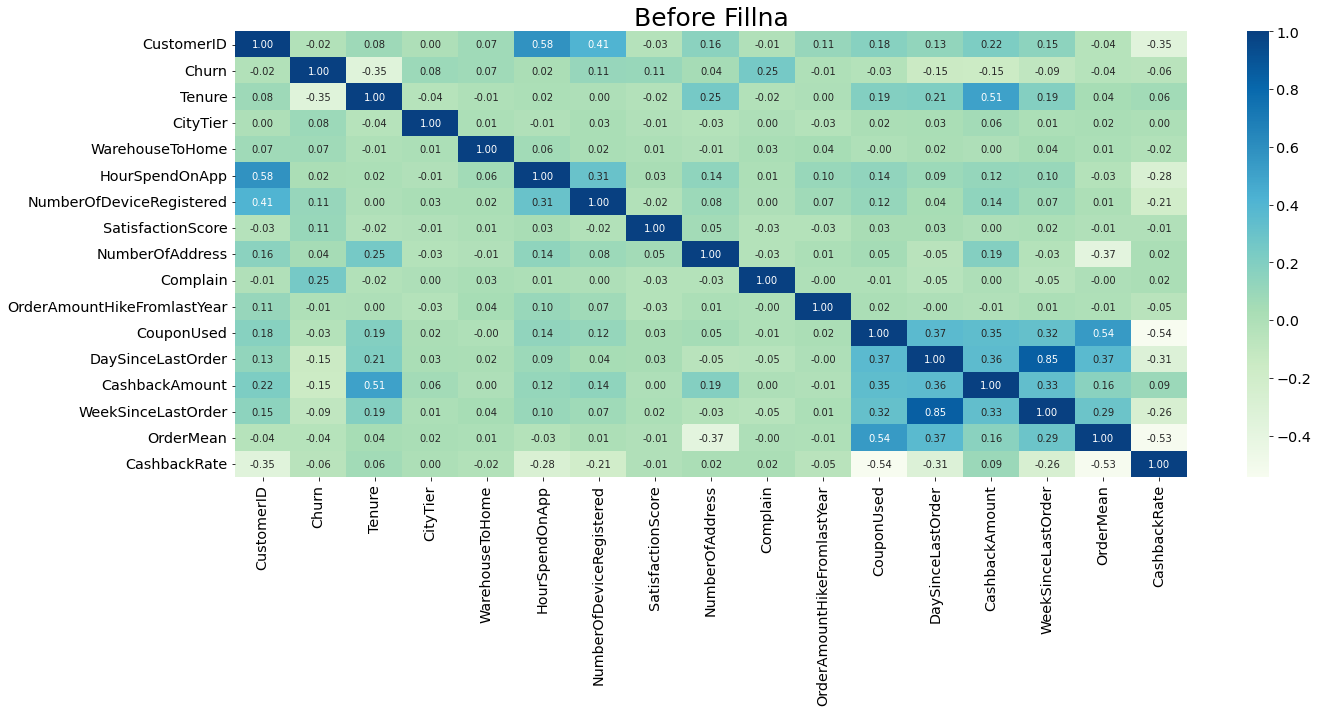

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(dp_mishandling.corr(), cmap='GnBu', annot=True, fmt='.2f') # nan
plt.title('Before Fillna', fontsize=25)

# 3. **Handling outliers**
- Using Z score

In [ ]:
from scipy import stats

### Using Z-Score

## 3.1. Using DaySinceLastOrder

In [ ]:
# Seluruh baris harus terisi, tidak boleh ada NaN, jika tidak maka akan terhapus semuanya
dp_weeks_zscore = dp_weeks.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dp_weeks)}')

filtered_entries = np.array([True] * len(dp_weeks))
columns = ['WarehouseToHome', 'CouponUsed', 'WeekSinceLastOrder', 'CashbackAmount']
#'OrderCount'
for col in columns:
    zscore = abs(stats.zscore(dp_weeks[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dp_weeks_zscore = dp_weeks_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dp_weeks_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5452


## 3.2. Using WeekSinceLastOrder

In [ ]:
dp_days_zscore = dp_days.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(dp_days)}')

filtered_entries = np.array([True] * len(dp_days))
columns = ['WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']
for col in columns:
    zscore = abs(stats.zscore(dp_days[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
dp_days_zscore = dp_days_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(dp_days_zscore)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5471


# 4. **Feature Transformation**
- Using Log Transformation to features: WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear
- Using Standardization to features:Tenure, CouponUsed, DaySinceLastOrder, CashbackAmount

## 4.1. Using DaySinceLastOrder without Handling Outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_days_transforms = dp_days.copy()
# kita tranformasi
for i in feature_log:
    dp_days_transforms[i] = np.log(dp_days_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_days_transforms[i] = StandardScaler().fit_transform(dp_days_transforms[i].values.reshape(len(dp_days_transforms), 1))

In [ ]:
dp_days_transforms.describe().T

count          mean          std           min  \
CustomerID                   5630.0  5.281550e+04  1625.385339  50001.000000   
Churn                        5630.0  1.683837e-01     0.374240      0.000000   
Tenure                       5630.0  4.038609e-17     1.000089     -1.125979   
CityTier                     5630.0  1.654707e+00     0.915389      1.000000   
WarehouseToHome              5630.0  2.616776e+00     0.501276      1.609438   
HourSpendOnApp               5630.0  2.936234e+00     0.702267      1.000000   
NumberOfDeviceRegistered     5630.0  3.688988e+00     1.023999      1.000000   
SatisfactionScore            5630.0  3.066785e+00     1.380194      1.000000   
NumberOfAddress              5630.0  1.255920e+00     0.613368      0.000000   
Complain                     5630.0  2.849023e-01     0.451408      0.000000   
OrderAmountHikeFromlastYear  5630.0  2.727586e+00     0.217814      2.397895   
CouponUsed                   5630.0 -4.038609e-17     1.000089     -0.867823   
DaySinceLastOrder            5630.0 -6.057913e-17     1.000089     -1.274928   
CashbackAmount               5630.0  4.038609e-17     1.000089     -3.601899   
OrderMean                    5630.0  1.038526e+00     1.362312      0.047619   
CashbackRate                 5630.0  9.514620e+01    55.961276      0.000000   

                                      25%           50%           75%  \
CustomerID                   51408.250000  52815.500000  54222.750000   
Churn                            0.000000      0.000000      0.000000   
Tenure                          -1.010051     -0.198559      0.612933   
CityTier                         1.000000      1.000000      3.000000   
WarehouseToHome                  2.197225      2.639057      2.995732   
HourSpendOnApp                   2.000000      3.000000      3.000000   
NumberOfDeviceRegistered         3.000000      4.000000      4.000000   
SatisfactionScore                2.000000      3.000000      4.000000   
NumberOfAddress                  0.693147      1.098612      1.791759   
Complain                         0.000000      0.000000      1.000000   
OrderAmountHikeFromlastYear      2.564949      2.708050      2.890372   
CouponUsed                      -0.409144     -0.409144      0.049534   
DaySinceLastOrder               -0.729043     -0.456100      0.908613   
CashbackAmount                  -0.639255     -0.283380      0.389602   
OrderMean                        0.333333      0.500000      1.000000   
CashbackRate                    53.026667     84.884167    130.183750   

                                      max  
CustomerID                   55630.000000  
Churn                            1.000000  
Tenure                           5.945596  
CityTier                         3.000000  
WarehouseToHome                  4.844187  
HourSpendOnApp                   5.000000  
NumberOfDeviceRegistered         6.000000  
SatisfactionScore                5.000000  
NumberOfAddress                  3.091042  
Complain                         1.000000  
OrderAmountHikeFromlastYear      3.258097  
CouponUsed                       6.471033  
DaySinceLastOrder               11.280436  
CashbackAmount                   3.003231  
OrderMean                       15.000000  
CashbackRate                   298.590000

## 4.2. Using WeekSinceLastOrder without Handling Outliers

In [ ]:

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_weeks_transforms = dp_weeks.copy()
# kita tranformasi
for i in feature_log:
    dp_weeks_transforms[i] = np.log(dp_weeks_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'WeekSinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_weeks_transforms[i] = StandardScaler().fit_transform(dp_weeks_transforms[i].values.reshape(len(dp_weeks_transforms), 1))

In [ ]:
dp_weeks_transforms.describe().T

count          mean          std           min  \
CustomerID                   5630.0  5.281550e+04  1625.385339  50001.000000   
Churn                        5630.0  1.683837e-01     0.374240      0.000000   
Tenure                       5630.0  4.038609e-17     1.000089     -1.125979   
CityTier                     5630.0  1.654707e+00     0.915389      1.000000   
WarehouseToHome              5630.0  2.616776e+00     0.501276      1.609438   
HourSpendOnApp               5630.0  2.936234e+00     0.702267      1.000000   
NumberOfDeviceRegistered     5630.0  3.688988e+00     1.023999      1.000000   
SatisfactionScore            5630.0  3.066785e+00     1.380194      1.000000   
NumberOfAddress              5630.0  1.255920e+00     0.613368      0.000000   
Complain                     5630.0  2.849023e-01     0.451408      0.000000   
OrderAmountHikeFromlastYear  5630.0  2.727586e+00     0.217814      2.397895   
CouponUsed                   5630.0 -4.038609e-17     1.000089     -0.867823   
CashbackAmount               5630.0  4.038609e-17     1.000089     -3.601899   
WeekSinceLastOrder           5630.0 -2.221235e-16     1.000089     -0.577290   
OrderMean                    5630.0  1.038526e+00     1.362312      0.047619   
CashbackRate                 5630.0  9.514620e+01    55.961276      0.000000   

                                      25%           50%           75%  \
CustomerID                   51408.250000  52815.500000  54222.750000   
Churn                            0.000000      0.000000      0.000000   
Tenure                          -1.010051     -0.198559      0.612933   
CityTier                         1.000000      1.000000      3.000000   
WarehouseToHome                  2.197225      2.639057      2.995732   
HourSpendOnApp                   2.000000      3.000000      3.000000   
NumberOfDeviceRegistered         3.000000      4.000000      4.000000   
SatisfactionScore                2.000000      3.000000      4.000000   
NumberOfAddress                  0.693147      1.098612      1.791759   
Complain                         0.000000      0.000000      1.000000   
OrderAmountHikeFromlastYear      2.564949      2.708050      2.890372   
CouponUsed                      -0.409144     -0.409144      0.049534   
CashbackAmount                  -0.639255     -0.283380      0.389602   
WeekSinceLastOrder              -0.577290     -0.577290      1.490231   
OrderMean                        0.333333      0.500000      1.000000   
CashbackRate                    53.026667     84.884167    130.183750   

                                      max  
CustomerID                   55630.000000  
Churn                            1.000000  
Tenure                           5.945596  
CityTier                         3.000000  
WarehouseToHome                  4.844187  
HourSpendOnApp                   5.000000  
NumberOfDeviceRegistered         6.000000  
SatisfactionScore                5.000000  
NumberOfAddress                  3.091042  
Complain                         1.000000  
OrderAmountHikeFromlastYear      3.258097  
CouponUsed                       6.471033  
CashbackAmount                   3.003231  
WeekSinceLastOrder              11.827838  
OrderMean                       15.000000  
CashbackRate                   298.590000

## 4.3. Using DaySinceLastOrder with Handling Outliers

In [ ]:

feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_days_zscore_transforms = dp_days_zscore.copy()
# kita tranformasi
for i in feature_log:
    dp_days_zscore_transforms[i] = np.log(dp_days_zscore_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_days_zscore_transforms[i] = StandardScaler().fit_transform(dp_days_zscore_transforms[i].values.reshape(len(dp_days_zscore_transforms), 1))

In [ ]:
dp_days_zscore_transforms.describe().T

count          mean          std           min  \
CustomerID                   5471.0  5.282053e+04  1625.296068  50001.000000   
Churn                        5471.0  1.709011e-01     0.376457      0.000000   
Tenure                       5471.0  4.155980e-17     1.000091     -1.111106   
CityTier                     5471.0  1.653080e+00     0.914593      1.000000   
WarehouseToHome              5471.0  2.616033e+00     0.498247      1.609438   
HourSpendOnApp               5471.0  2.935661e+00     0.702744      1.000000   
NumberOfDeviceRegistered     5471.0  3.685067e+00     1.027801      1.000000   
SatisfactionScore            5471.0  3.058307e+00     1.377304      1.000000   
NumberOfAddress              5471.0  1.255147e+00     0.613545      0.000000   
Complain                     5471.0  2.867849e-01     0.452302      0.000000   
OrderAmountHikeFromlastYear  5471.0  2.727865e+00     0.217926      2.397895   
CouponUsed                   5471.0 -1.246794e-16     1.000091     -1.039220   
DaySinceLastOrder            5471.0  2.077990e-17     1.000091     -1.319814   
CashbackAmount               5471.0 -1.038995e-16     1.000091     -2.931666   
OrderMean                    5471.0  9.659246e-01     1.225041      0.047619   
CashbackRate                 5471.0  9.701247e+01    55.310706      4.111111   

                                      25%           50%           75%  \
CustomerID                   51413.500000  52814.000000  54225.500000   
Churn                            0.000000      0.000000      0.000000   
Tenure                          -0.994221     -0.176023      0.642176   
CityTier                         1.000000      1.000000      3.000000   
WarehouseToHome                  2.197225      2.639057      2.995732   
HourSpendOnApp                   2.000000      3.000000      3.000000   
NumberOfDeviceRegistered         3.000000      4.000000      4.000000   
SatisfactionScore                2.000000      3.000000      4.000000   
NumberOfAddress                  0.693147      1.098612      1.791759   
Complain                         0.000000      0.000000      1.000000   
OrderAmountHikeFromlastYear      2.564949      2.708050      2.890372   
CouponUsed                      -0.418660     -0.418660      0.201900   
DaySinceLastOrder               -0.732622     -0.439026      1.028955   
CashbackAmount                  -0.635412     -0.281939      0.369602   
OrderMean                        0.333333      0.500000      1.000000   
CashbackRate                    58.230000     86.195000    131.355000   

                                      max  
CustomerID                   55630.000000  
Churn                            1.000000  
Tenure                           6.018907  
CityTier                         3.000000  
WarehouseToHome                  3.583519  
HourSpendOnApp                   5.000000  
NumberOfDeviceRegistered         6.000000  
SatisfactionScore                5.000000  
NumberOfAddress                  3.091042  
Complain                         1.000000  
OrderAmountHikeFromlastYear      3.258097  
CouponUsed                       3.925263  
DaySinceLastOrder                3.084128  
CashbackAmount                   3.152978  
OrderMean                       14.000000  
CashbackRate                   298.590000

## 4.4. Using WeekSinceLastOrder with Handling Outliers

In [ ]:
feature_log = ['WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear']
# , 'OrderCount'
dp_weeks_zscore_transforms = dp_weeks_zscore.copy()
# kita tranformasi
for i in feature_log:
    dp_weeks_zscore_transforms[i] = np.log(dp_weeks_zscore_transforms[i])

    
feature_log = ['Tenure', 'CouponUsed', 'WeekSinceLastOrder', 'CashbackAmount']


# kita tranformasi
for i in feature_log:
    dp_weeks_zscore_transforms[i] = StandardScaler().fit_transform(dp_weeks_zscore_transforms[i].values.reshape(len(dp_weeks_zscore_transforms), 1))

In [ ]:
dp_weeks_zscore_transforms.describe().T

count          mean          std           min  \
CustomerID                   5452.0  5.282084e+04  1624.121571  50001.000000   
Churn                        5452.0  1.711299e-01     0.376657      0.000000   
Tenure                       5452.0  1.042616e-17     1.000092     -1.109337   
CityTier                     5452.0  1.654622e+00     0.915094      1.000000   
WarehouseToHome              5452.0  2.616359e+00     0.498728      1.609438   
HourSpendOnApp               5452.0  2.936354e+00     0.703128      1.000000   
NumberOfDeviceRegistered     5452.0  3.685620e+00     1.027699      1.000000   
SatisfactionScore            5452.0  3.057594e+00     1.377940      1.000000   
NumberOfAddress              5452.0  1.253943e+00     0.613135      0.000000   
Complain                     5452.0  2.870506e-01     0.452427      0.000000   
OrderAmountHikeFromlastYear  5452.0  2.727803e+00     0.217976      2.397895   
CouponUsed                   5452.0  4.170464e-17     1.000092     -1.038786   
CashbackAmount               5452.0  6.255695e-17     1.000092     -2.941384   
WeekSinceLastOrder           5452.0 -6.255695e-17     1.000092     -0.576221   
OrderMean                    5452.0  9.631619e-01     1.221814      0.047619   
CashbackRate                 5452.0  9.714197e+01    55.312315      4.111111   

                                      25%           50%           75%  \
CustomerID                   51412.750000  52814.500000  54225.250000   
Churn                            0.000000      0.000000      0.000000   
Tenure                          -0.992386     -0.173731      0.644923   
CityTier                         1.000000      1.000000      3.000000   
WarehouseToHome                  2.197225      2.639057      2.995732   
HourSpendOnApp                   2.000000      3.000000      3.000000   
NumberOfDeviceRegistered         3.000000      4.000000      4.000000   
SatisfactionScore                2.000000      3.000000      4.000000   
NumberOfAddress                  0.693147      1.098612      1.791759   
Complain                         0.000000      0.000000      1.000000   
OrderAmountHikeFromlastYear      2.564949      2.708050      2.890372   
CouponUsed                      -0.417247     -0.417247      0.204292   
CashbackAmount                  -0.633649     -0.282749      0.371124   
WeekSinceLastOrder              -0.576221     -0.576221     -0.576221   
OrderMean                        0.333333      0.500000      1.000000   
CashbackRate                    58.387500     86.340000    131.490000   

                                      max  
CustomerID                   55630.000000  
Churn                            1.000000  
Tenure                           6.024656  
CityTier                         3.000000  
WarehouseToHome                  3.583519  
HourSpendOnApp                   5.000000  
NumberOfDeviceRegistered         6.000000  
SatisfactionScore                5.000000  
NumberOfAddress                  3.091042  
Complain                         1.000000  
OrderAmountHikeFromlastYear      3.258097  
CouponUsed                       3.933525  
CashbackAmount                   3.173965  
WeekSinceLastOrder               1.735446  
OrderMean                       14.000000  
CashbackRate                   298.590000

# 5. **Feature Encoding**
- PreferredLoginDevice ====> One Hot Encoding
- PreferredPaymentMode ====> One Hot Encoding
- Gender  =================> One Hot Encoding
- PreferedOrderCat ========> One Hot Encoding
- MaritalStatus ===========> One Hot Encoding

## 5.1. Using DaySinceLastOrder without Handling Outliers

In [ ]:
# WARNING: run code ini sekali saja
dp_days_transforms_onehots = dp_days_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_days_transforms_onehots[cats], prefix=cats)
    dp_days_transforms_onehots = dp_days_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_days_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_days_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

## 5.2. Using WeekSinceLastOrder without Handling Outliers

In [ ]:
# WARNING: run code ini sekali saja
dp_weeks_transforms_onehots = dp_weeks_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_weeks_transforms_onehots[cats], prefix=cats)
    dp_weeks_transforms_onehots = dp_weeks_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_weeks_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_weeks_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'CashbackAmount', 'WeekSinceLastOrder', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

## 5.3. Using DaySinceLastOrder with Handling Outliers

In [ ]:
# WARNING: run code ini sekali saja
dp_days_zscore_transforms_onehots = dp_days_zscore_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_days_zscore_transforms_onehots[cats], prefix=cats)
    dp_days_zscore_transforms_onehots = dp_days_zscore_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_days_zscore_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_days_zscore_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

## 5.4. Using WeekSinceLastOrder with Handling Outliers

In [ ]:
# WARNING: run code ini sekali saja
dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms.copy()

for cats in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    df_onehots = pd.get_dummies(dp_weeks_zscore_transforms_onehots[cats], prefix=cats)
    dp_weeks_zscore_transforms_onehots = dp_weeks_zscore_transforms_onehots.join(df_onehots)

for i in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender']:
    dp_weeks_zscore_transforms_onehots.drop(i,axis=1, inplace=True)
    
dp_weeks_zscore_transforms_onehots.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'CashbackAmount', 'WeekSinceLastOrder', 'OrderMean',
       'CashbackRate', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
dp.columns()

# Modeling (T)

In [ ]:
# b = ['A','B','C']
# c = []
# A = 1
# B = 2
# C = 3
# d = {'A':A, 'B':B , 'C':C}
# a = [A,B,C]
# for i in d.keys():
#   print(d[i])

# def eval_classification(model):
#     y_pred = model.predict(X_test)
#     y_pred_train = model.predict(X_train)
#     y_pred_proba = model.predict_proba(X_test)
#     y_pred_proba_train = model.predict_proba(X_train)
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

#     score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
#     print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
#     print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate

def get_metrics(y_pred, y_act, y_pred_proba, score, model_name):
  
  accuracy = accuracy_score(y_act, y_pred)
  precision = precision_score(y_act, y_pred)
  recall =  recall_score(y_act, y_pred)
  # roc_auc = roc_auc_score(y_act, y_pred)
  f1 = f1_score(y_act, y_pred)
  # accuracy = balanced_accuracy_score(y_act, y_pred)
  

  roc_auc_proba = roc_auc_score(y_act, y_pred_proba[:, 1])
  # roc_auc(crossval-train) = score['train_score'].mean()
  # roc_auc(crossval-test) = score['test_score'].mean()

  metrics_result = dict(model_name=model_name,
                        accuracy=accuracy,
                        precision=precision, 
                        recall=recall,
                        # roc_auc=roc_auc, 
                        f1=f1,
                        roc_auc_proba=roc_auc_proba,
                        score=score
                        )
  
  return metrics_result


def prediction(X_train, y_train, X_test, y_test, model, model_name='decision tree'):
  
  model = model
  model.fit(X_train, y_train)
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  # y_pred = model.predict(X_test)
  # y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)

  skor = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
  score_train = skor['train_score'].mean()
  score_test = skor['test_score'].mean()
  result = dict()
  test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, y_pred_proba=y_pred_proba, score=score_test, model_name=model_name)
  train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, y_pred_proba=y_pred_proba_train, score=score_train, model_name=model_name)

  result['test'] = test_result
  result['train'] = train_result
  result['y_test'] = y_test
  result['y_test_pred'] = y_test_pred
  result['y_train'] = y_train
  result['y_train_pred'] = y_train_pred
  result['model'] = model
  result['X_train'] = X_train
  result['X_test'] = X_test

  del model

  return result

  # def eval_classification(model):
  #   y_pred = model.predict(X_test)
  #   y_pred_train = model.predict(X_train)
  #   y_pred_proba = model.predict_proba(X_test)
  #   y_pred_proba_train = model.predict_proba(X_train)
    
    # print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    # print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    # print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    # print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    # print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    # print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    # score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    # print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    # print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


## Logistic Regression

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

LR = pd.DataFrame()
LR_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  LR1 = LR3['train']
  LR2 = LR3['test']
  LR = LR.append(LR1,ignore_index=True)
  LR = LR.append(LR2,ignore_index=True)
LR


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LogisticRegression() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3_smote = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  LR1_smote = LR3_smote['train']
  # LR2_smote = LR3_smote
  LR2_smote = LR3_smote['test']
  LR_smote = LR_smote.append(LR1_smote,ignore_index=True)
  LR_smote = LR_smote.append(LR2_smote,ignore_index=True)
LR = LR.append(LR_smote)
LR


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.890320   0.772358  0.498688  0.606061   
1       dp_days_transforms_onehots  0.892540   0.768595  0.500000  0.605863   
0  dp_days_transforms_onehotsSMOTE  0.863119   0.826968  0.752501  0.787979   
1  dp_days_transforms_onehotsSMOTE  0.873310   0.820388  0.764706  0.791569   

   roc_auc_proba     score  
0       0.888638  0.893593  
1       0.900486  0.868608  
0       0.925740  0.932960  
1       0.926427  0.865770

## Logistic Regression Hyperparameter Tuning

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

LR_hyper = pd.DataFrame()
LR_smote = pd.DataFrame()

penalty = ['l1','l2','elasticnet','none']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

a = {'dp_days_transforms_onehots':dp_days_transforms_onehots,}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  logreg = LogisticRegression() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  LR1 = LR3['train']
  LR2 = LR3['test']
  LR_hyper = LR_hyper.append(LR1,ignore_index=True)
  LR_hyper = LR_hyper.append(LR2,ignore_index=True)
LR_hyper


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  logreg = LogisticRegression() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  LR3_smote = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  LR1_smote = LR3_smote['train']
  # LR2_smote = LR3_smote
  LR2_smote = LR3_smote['test']
  LR_smote = LR_smote.append(LR1_smote,ignore_index=True)
  LR_smote = LR_smote.append(LR2_smote,ignore_index=True)
LR_hyper = LR_hyper.append(LR_smote)
LR_hyper


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.896092   0.779468  0.538058  0.636646   
1       dp_days_transforms_onehots  0.894316   0.763780  0.521505  0.619808   
0  dp_days_transforms_onehotsSMOTE  0.888572   0.876404  0.780411  0.825627   
1  dp_days_transforms_onehotsSMOTE  0.891103   0.851582  0.791855  0.820633   

   roc_auc_proba     score  
0       0.894445  0.898453  
1       0.904856  0.886839  
0       0.941603  0.944755  
1       0.940930  0.905980

## kNN

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

kNN = pd.DataFrame()
kNN_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # knn
  from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
  model = KNeighborsClassifier() # inisiasi object dengan nama knn
  model.fit(X_train, y_train) # fit model KNN dari data train
  # eval_classification(knn)
 

  kNN3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  
  kNN2 = kNN3['test']
  kNN1 = kNN3['train']
  kNN = kNN.append(kNN1,ignore_index=True)
  kNN = kNN.append(kNN2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = KNeighborsClassifier() # inisiasi object dengan nama logreg
  model.fit(X_train, y_train) # fit model regression dari data train
  # eval_classification(logreg)

  kNN_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')

  kNN_smote2 = kNN_smote3['test']
  kNN_smote1 = kNN_smote3['train']
  kNN_smote = kNN_smote.append(kNN_smote1,ignore_index=True)
  kNN_smote = kNN_smote.append(kNN_smote2,ignore_index=True)
kNN = kNN.append(kNN_smote)
kNN


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.910968   0.866126  0.560367  0.680478   
1       dp_days_transforms_onehots  0.886323   0.802083  0.413978  0.546099   
0  dp_days_transforms_onehotsSMOTE  0.942328   0.861736  0.987888  0.920510   
1  dp_days_transforms_onehotsSMOTE  0.897509   0.774908  0.950226  0.853659   

   roc_auc_proba     score  
0       0.963784  0.972926  
1       0.876939  0.652025  
0       0.994631  0.994948  
1       0.970232  0.773607

## kNN Hyperparameter Tuning

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split

kNN_hyper = pd.DataFrame()
kNN_smote = pd.DataFrame()
n_neighbors = list(range(1,30))
p=[1,2,3]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
  knn = KNeighborsClassifier() # inisiasi object dengan nama knn
  model = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model KNN dari data train
 

  kNN3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  
  kNN2 = kNN3['test']
  kNN1 = kNN3['train']
  kNN_hyper = kNN_hyper.append(kNN1,ignore_index=True)
  kNN_hyper = kNN_hyper.append(kNN2,ignore_index=True)


for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  knn = KNeighborsClassifier() # inisiasi object dengan nama logreg
  model = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model regression dari data train

  kNN_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  kNN_smote2 = kNN_smote3['test']
  kNN_smote1 = kNN_smote3['train']
  kNN_smote = kNN_smote.append(kNN_smote1,ignore_index=True)
  kNN_smote = kNN_smote.append(kNN_smote2,ignore_index=True)
kNN_hyper = kNN_hyper.append(kNN_smote)
kNN_hyper


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_days_transforms_onehots  0.949378   0.970803  0.715054  0.823529   
0  dp_days_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_days_transforms_onehotsSMOTE  0.952313   0.891441  0.966063  0.927253   

   roc_auc_proba     score  
0       1.000000  1.000000  
1       0.970659  0.719009  
0       1.000000  1.000000  
1       0.993069  0.809409

## DecisionTree

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

DT = pd.DataFrame()
DT_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  model = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model.fit(X_train, y_train) # fit model decision tree dari data train
  DT3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  DT2 = DT3['test']
  DT1 = DT3['train']
  DT = DT.append(DT1,ignore_index=True)
  DT = DT.append(DT2,ignore_index=True)

# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # decision tree
  model = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model.fit(X_train, y_train) # fit model decision tree dari data train
  # eval_classification(dt)

  DT_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  DT_smote2 = DT_smote3['test']
  DT_smote1 = DT_smote3['train']
  DT_smote = DT_smote.append(DT_smote1,ignore_index=True)
  DT_smote = DT_smote.append(DT_smote2,ignore_index=True)
DT = DT.append(DT_smote)
DT


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_days_transforms_onehots  0.978686   0.955056  0.913978  0.934066   
0  dp_days_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_days_transforms_onehotsSMOTE  0.960142   0.930804  0.943439  0.937079   

   roc_auc_proba     score  
0       1.000000  1.000000  
1       0.952734  0.790605  
0       1.000000  1.000000  
1       0.955624  0.697973

## DecisionTree Hyperparameter Tuning

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

DT = pd.DataFrame()
DT_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['gini','entropy','log_loss']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model = RandomizedSearchCV(dt, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model decision tree dari data train
  DT3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  DT2 = DT3['test']
  DT1 = DT3['train']
  DT = DT.append(DT1,ignore_index=True)
  DT = DT.append(DT2,ignore_index=True)

# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # decision tree
  dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
  model = RandomizedSearchCV(dt, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train) # fit model decision tree dari data train
  # eval_classification(dt)

  DT_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  DT_smote2 = DT_smote3['test']
  DT_smote1 = DT_smote3['train']
  DT_smote = DT_smote.append(DT_smote1,ignore_index=True)
  DT_smote = DT_smote.append(DT_smote2,ignore_index=True)
DT = DT.append(DT_smote)
DT


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mess

model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.948046   0.873938  0.809711  0.840599   
1       dp_days_transforms_onehots  0.902309   0.726190  0.655914  0.689266   
0  dp_days_transforms_onehotsSMOTE  0.936988   0.926560  0.883623  0.904582   
1  dp_days_transforms_onehotsSMOTE  0.871886   0.799087  0.791855  0.795455   

   roc_auc_proba     score  
0       0.987631  0.872858  
1       0.921854  0.765741  
0       0.988709  0.979527  
1       0.927826  0.830535

## RANDOM FOREST

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
RF = pd.DataFrame()
RF_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Bagging: Random Forest

  model = RandomForestClassifier(random_state=42)
  model.fit(X_train, y_train)

  RF3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  RF2 = RF3['test']
  RF1 = RF3['train']
  RF = RF.append(RF1,ignore_index=True)
  RF = RF.append(RF2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # RANDOMFOREST
  model = RandomForestClassifier(random_state=42)
  model.fit(X_train, y_train)
  # eval_classification(dt)

  RF_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  RF_smote2 = RF_smote3['test']
  RF_smote1 = RF_smote3['train']
  RF_smote = RF_smote.append(RF_smote1,ignore_index=True)
  RF_smote = RF_smote.append(RF_smote2,ignore_index=True)
RF = RF.append(RF_smote)
RF


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_days_transforms_onehots  0.971581   0.981250  0.844086  0.907514   
0  dp_days_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_days_transforms_onehotsSMOTE  0.979359   0.976905  0.957014  0.966857   

   roc_auc_proba     score  
0       1.000000  1.000000  
1       0.996177  0.937036  
0       1.000000  1.000000  
1       0.997605  0.917447

## RANDOM FOREST Hyperparameter Tuning


In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
RF = pd.DataFrame()
RF_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

n_estimators = [int(x) for x in np.linspace(1, 300, 60)]
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['gini','entropy','log_loss']
splitter = ['best','random']
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# rf = RandomForestClassifier(random_state=42)
# rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
# rs.fit(X_train, y_train)

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Bagging: Random Forest

  rf = RandomForestClassifier(random_state=42)
  model = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train)

  RF3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  RF2 = RF3['test']
  RF1 = RF3['train']
  RF = RF.append(RF1,ignore_index=True)
  RF = RF.append(RF2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # RANDOMFOREST
  rf = RandomForestClassifier(random_state=42)
  model = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
  model.fit(X_train, y_train)
  # eval_classification(dt)

  RF_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  RF_smote2 = RF_smote3['test']
  RF_smote1 = RF_smote3['train']
  RF_smote = RF_smote.append(RF_smote1,ignore_index=True)
  RF_smote = RF_smote.append(RF_smote2,ignore_index=True)
RF = RF.append(RF_smote)
RF


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.953375   0.985915  0.734908  0.842105   
1       dp_days_transforms_onehots  0.923623   0.896825  0.607527  0.724359   
0  dp_days_transforms_onehotsSMOTE  0.970630   0.971708  0.940495  0.955847   
1  dp_days_transforms_onehotsSMOTE  0.929537   0.915254  0.855204  0.884211   

   roc_auc_proba     score  
0       0.993075  0.994950  
1       0.972609  0.915926  
0       0.997370  0.994370  
1       0.985479  0.842020

## AdaBoost

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
AB = pd.DataFrame()
AB_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: AdaBoost

  model = AdaBoostClassifier()
  model.fit(X_train, y_train)

  AB3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  AB2 = AB3['test']
  AB1 = AB3['train']
  AB = AB.append(AB1,ignore_index=True)
  AB = AB.append(AB2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # ADABOOST
  model = AdaBoostClassifier()
  model.fit(X_train, y_train)


  AB_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  AB_smote2 = AB_smote3['test']
  AB_smote1 = AB_smote3['train']
  AB_smote = AB_smote.append(AB_smote1,ignore_index=True)
  AB_smote = AB_smote.append(AB_smote2,ignore_index=True)
AB = AB.append(AB_smote)
AB


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.900533   0.761667  0.599738  0.671072   
1       dp_days_transforms_onehots  0.902309   0.779412  0.569892  0.658385   
0  dp_days_transforms_onehotsSMOTE  0.884300   0.848299  0.800948  0.823944   
1  dp_days_transforms_onehotsSMOTE  0.888256   0.833724  0.805430  0.819333   

   roc_auc_proba     score  
0       0.928691  0.933468  
1       0.915228  0.873499  
0       0.949074  0.955423  
1       0.943904  0.794496

## AdaBoost Hyperparameter Tuning

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
AB_hyper = pd.DataFrame()
AB_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: AdaBoost
# ab = AdaBoostClassifier(random_state=42)
  ab = AdaBoostClassifier()
  model = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
  model.fit(X_train, y_train)

  AB_hyper3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  AB_hyper2 = AB_hyper3['test']
  AB_hyper1 = AB_hyper3['train']
  AB_hyper = AB.append(AB_hyper1,ignore_index=True)
  AB_hyper = AB.append(AB_hyper2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # ADABOOST
  ab = AdaBoostClassifier()
  model = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
  model.fit(X_train, y_train)


  AB_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  AB_smote2 = AB_smote3['test']
  AB_smote1 = AB_smote3['train']
  AB_smote = AB_smote.append(AB_smote1,ignore_index=True)
  AB_smote = AB_smote.append(AB_smote2,ignore_index=True)
AB_hyper = AB_hyper.append(AB_smote)
AB_hyper


Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error


model_name  accuracy  precision    recall        f1  \
0  dp_days_transforms_onehotsSMOTE  0.897828   0.869492  0.820958  0.844529   
1  dp_days_transforms_onehotsSMOTE  0.903203   0.846154  0.846154  0.846154   

   roc_auc_proba     score  
0       0.959490  0.902494  
1       0.955134  0.752885

## XGBoost

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

XG = pd.DataFrame()
XG_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost

  model = XGBClassifier()
  model.fit(X_train, y_train)

  XG3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  XG2 = XG3['test']
  XG1 = XG3['train']
  XG = XG.append(XG1,ignore_index=True)
  XG = XG.append(XG2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  model = XGBClassifier()
  model.fit(X_train, y_train)
  

  XG_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  XG_smote2 = XG_smote3['test']
  XG_smote1 = XG_smote3['train']
  XG_smote = XG_smote.append(XG_smote1,ignore_index=True)
  XG_smote = XG_smote.append(XG_smote2,ignore_index=True)
XG = XG.append(XG_smote)
XG


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.923845   0.869489  0.646982  0.741911   
1       dp_days_transforms_onehots  0.909414   0.828125  0.569892  0.675159   
0  dp_days_transforms_onehotsSMOTE  0.921680   0.909601  0.853081  0.880435   
1  dp_days_transforms_onehotsSMOTE  0.907473   0.871429  0.828054  0.849188   

   roc_auc_proba     score  
0       0.959783  0.962763  
1       0.944950  0.902142  
0       0.973797  0.978389  
1       0.963942  0.788599

## XGBoost Hyperparameter Tuning

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

XG = pd.DataFrame()
XG_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }


for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # DT
  # Boosting: XGBoost

  xg = XGBClassifier()
  model = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
  model.fit(X_train, y_train)

  XG3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  XG2 = XG3['test']
  XG1 = XG3['train']
  XG = XG.append(XG1,ignore_index=True)
  XG = XG.append(XG2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # xgboost
  xg = XGBClassifier()
  model = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
  model.fit(X_train, y_train)
  

  XG_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  XG_smote2 = XG_smote3['test']
  XG_smote1 = XG_smote3['train']
  XG_smote = XG_smote.append(XG_smote1,ignore_index=True)
  XG_smote = XG_smote.append(XG_smote2,ignore_index=True)
XG = XG.append(XG_smote)
XG


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_days_transforms_onehots  0.972173   0.928000  0.888889  0.908023   
0  dp_days_transforms_onehotsSMOTE  0.999797   0.999396  1.000000  0.999698   
1  dp_days_transforms_onehotsSMOTE  0.971998   0.960294  0.953285  0.956777   

   roc_auc_proba     score  
0       1.000000  0.999989  
1       0.992348  0.923965  
0       1.000000  0.999896  
1       0.993091  0.869994

## CatBoost

In [ ]:
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost as CatBoostClassifier

CB = pd.DataFrame()
CB_smote = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost
  # cb = CBClassifier()
  model = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  model.fit(X_train,y_train)

  CB3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  CB2 = CB3['test']
  CB1 = CB3['train']
  CB = CB.append(CB1,ignore_index=True)
  CB = CB.append(CB2,ignore_index=True)

# cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
# cat.fit(x_train,y_train)
# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  # cb = CBClassifier()
  model = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  model.fit(X_train,y_train)
  

  CB_smote3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  CB_smote2 = CB_smote3['test']
  CB_smote1 = CB_smote3['train']
  CB_smote = CB_smote.append(CB_smote1,ignore_index=True)
  CB_smote = CB_smote.append(CB_smote2,ignore_index=True)
CB = CB.append(CB_smote)
CB


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  0.993561   0.994602  0.967192  0.980705   
1       dp_days_transforms_onehots  0.966252   0.962500  0.827957  0.890173   
0  dp_days_transforms_onehotsSMOTE  0.996618   0.997881  0.992101  0.994983   
1  dp_days_transforms_onehotsSMOTE  0.972242   0.967517  0.943439  0.955326   

   roc_auc_proba     score  
0       0.999806  0.999970  
1       0.994052  0.925530  
0       0.999867  0.999959  
1       0.995776  0.892404

## CatBoost Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

CB_hyper = pd.DataFrame()
CB_smote_ = pd.DataFrame()
a = {'dp_days_transforms_onehots':dp_days_transforms_onehots}

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # DT
  # Boosting: XGBoost

  cb = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  model = RandomizedSearchCV(cb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
  model.fit(X_train, y_train)

  CB_hyper3 = prediction(X_train, y_train, X_test, y_test, model, model_name=i)
  CB_hyper2 = CB_hyper3['test']
  CB_hyper1 = CB_hyper3['train']
  CB_hyper = CB_hyper.append(CB_hyper1,ignore_index=True)
  CB_hyper = CB_hyper.append(CB_hyper2,ignore_index=True)


# pd.DataFrame(prediksi['test'])
# prediksi['test']
for i in a.keys():
  X = a[i].drop(['Churn','CustomerID'], axis=1)
  y = a[i]['Churn']
  X, y = over_sampling.SMOTE(0.5).fit_resample(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # xgboost
  cb = CatBoostClassifier.CatBoostClassifier(random_state=42, logging_level='Silent')
  model = RandomizedSearchCV(cb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
  model.fit(X_train, y_train)
  

  CB_smote33 = prediction(X_train, y_train, X_test, y_test, model, model_name=i + 'SMOTE')
  
  CB_smote22 = CB_smote33['test']
  CB_smote11 = CB_smote33['train']
  CB_smote_ = CB_smote_.append(CB_smote11,ignore_index=True)
  CB_smote_ = CB_smote_.append(CB_smote22,ignore_index=True)
CB_hyper = CB_hyper.append(CB_smote_)
CB_hyper

Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error


model_name  accuracy  precision    recall        f1  \
0       dp_days_transforms_onehots  1.000000   1.000000  1.000000  1.000000   
1       dp_days_transforms_onehots  0.988455   0.988701  0.940860  0.964187   
0  dp_days_transforms_onehotsSMOTE  1.000000   1.000000  1.000000  1.000000   
1  dp_days_transforms_onehotsSMOTE  0.992171   0.982103  0.993213  0.987627   

   roc_auc_proba     score  
0       1.000000  0.997841  
1       0.998341  0.927462  
0       1.000000  1.000000  
1       0.998440  0.913806

In [ ]:
# ! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.1 MB/s 


Dari hasil modeling, model CatBoost adalah model dengan hasil terbaik yaitu recall train: dan recall test:

#Feature Importance

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.6 MB/s 


In [ ]:
# model interpretation CatBoost
import shap
explainer = shap.Explainer(RF3['model'].predict, RF3['X_test'])
shap_values_cat = explainer(RF3['X_test'])

Permutation explainer: 1127it [08:10,  2.28it/s]


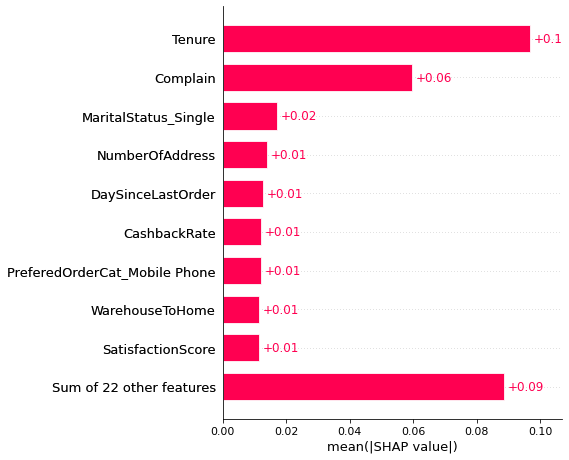

In [ ]:
shap.plots.bar(shap_values_cat)

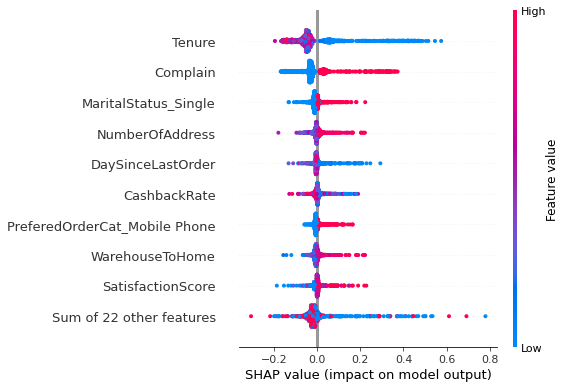

In [ ]:
shap.plots.beeswarm(shap_values_cat)

In [ ]:
# model interpretation CatBoost
import shap
explainerr = shap.Explainer(CB3['model'].predict, CB3['X_test'])
shap_values_catt = explainerr(CB3['X_test'])

Permutation explainer: 1127it [01:16, 13.63it/s]                          


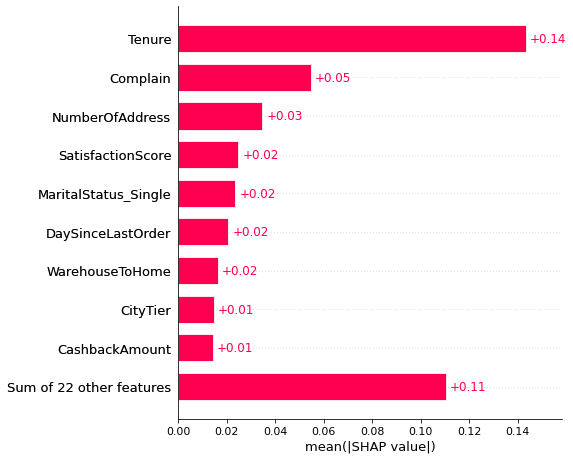

In [ ]:
shap.plots.bar(shap_values_catt)

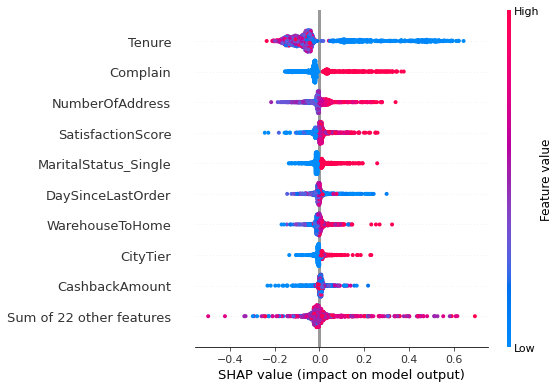

In [ ]:
shap.plots.beeswarm(shap_values_catt)

Feature terpenting berturut turut berdasarkan shap value adalah tenure, complain, number of address, satisfaction score, marital status single, day since last order, warehouse to home, city tier cashback amount dan seterusnya.

Tenure:
Semakin kecil nilai tenure (biru), maka pengaruh customer akan churn semakin besar. Tenure adalah feature yang paling mempengaruhi customer akan churn atau tidak.

Complain:
Semakin besar angka complain suatu customer (merah), customer akan cenderung churn (shap value positif)

Number of address:
Banyaknya alamat yang dimiliki seorang customer sebagai tujuan pengiriman juga memberikan dampak yang cukup besar pada tingkat customer itu sendiri. Semakin banyak alamat semakin positif seorang customer akan churn.

# Bussiness Insight

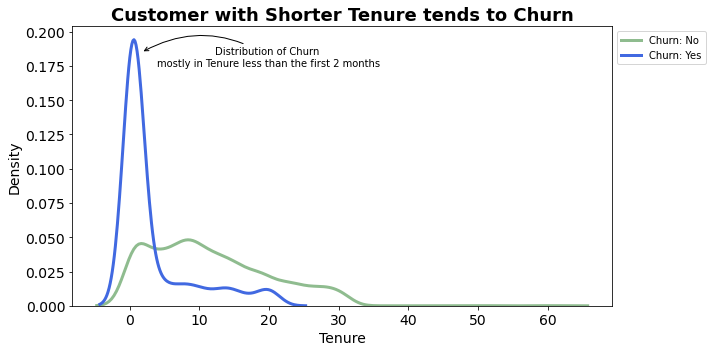

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'darkseagreen', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'royalblue', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Distribution of Churn \nmostly in Tenure less than the first 2 months', 
            xy=(1.75, 0.185), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

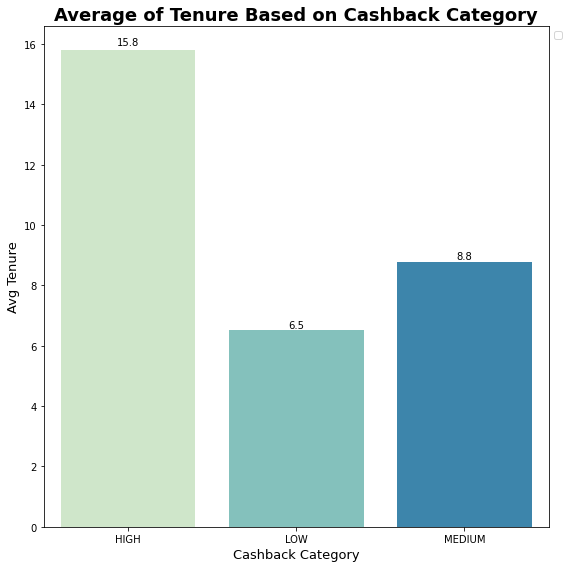

In [ ]:
#melakukan kategorisasi cashback amount
df0=df['CashbackAmount'].reset_index()
Q1 = df0['CashbackAmount'].quantile(0.25)
Q3 = df0['CashbackAmount'].quantile(0.75)

df0['CashCat']=np.where(df0['CashbackAmount']<Q1,'LOW',
                        np.where(df0['CashbackAmount'] <= Q3, 'MEDIUM', 'HIGH'))

#join kolom
df1 = df[['CustomerID','Churn','Tenure','CashbackAmount']]
df2 = df1.join(df0.set_index('CashbackAmount'), on='CashbackAmount').reset_index()
df3 = df2.groupby(['CashCat']).agg({'Tenure':'mean','CustomerID':'nunique'}).reset_index()
df3.columns= ['CashCat','AvgTenure','TotalCust']
df3

#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df3, x='CashCat', y='AvgTenure', palette='GnBu')
plt.title('Average of Tenure Based on Cashback Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Cashback Category',fontsize=13);
plt.ylabel('Avg Tenure',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

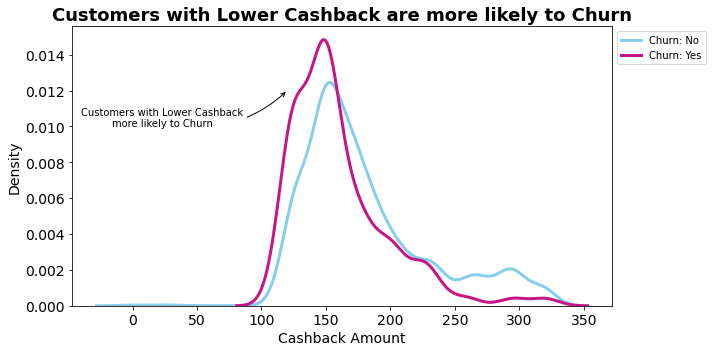

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['CashbackAmount'].dropna(), color= 'skyblue', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['CashbackAmount'].dropna(), color= 'mediumvioletred', label= 'Churn: Yes', ax=ax)

ax.set_title('Customers with Lower Cashback are more likely to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cashback Amount', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('Customers with Lower Cashback\nmore likely to Churn', 
            xy=(120, 0.012), xytext=(23, 0.01), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

**Insight**:
Pelanggan dengan tenure rendah cenderung mendapatkan cashback yang tergolong sedikit dan memiliki potensi untuk melakukan churn

**Business Recommendation**: Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.

- **Churn, Complain, dan PreferredOrderCat**

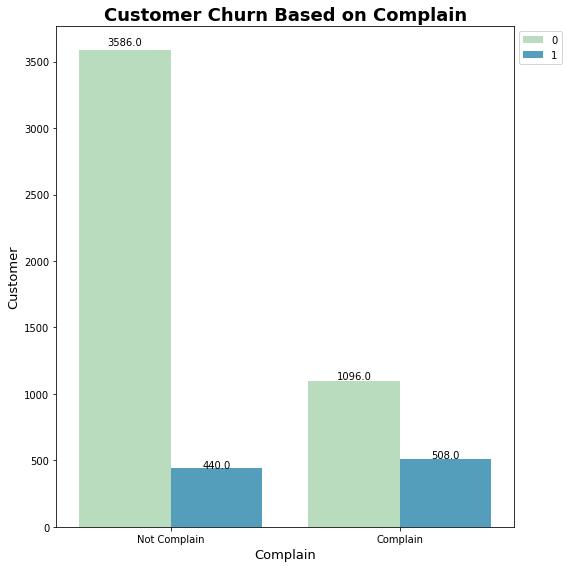

In [ ]:
dfchurncomplain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfchurncomplain['Complain'] = dfchurncomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
#visualisasi
plt.figure(figsize=(8,8))
ax = sns.barplot(data=dfchurncomplain, x='Complain', y='CustomerID', hue='Churn', palette='GnBu')
plt.title('Customer Churn Based on Complain', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Complain',fontsize=13);
plt.ylabel('Customer',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [ ]:
dfcategory0=df.groupby(['PreferedOrderCat','Churn', 'Complain',]).agg({'CustomerID':'count'}).reset_index()
dfcategory0['Complain'] = dfcategory0['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcategory0

PreferedOrderCat  Churn      Complain  CustomerID
0              Fashion      0  Not Complain         508
1              Fashion      0      Complain         190
2              Fashion      1  Not Complain          76
3              Fashion      1      Complain          52
4              Grocery      0  Not Complain         276
5              Grocery      0      Complain         114
6              Grocery      1  Not Complain           8
7              Grocery      1      Complain          12
8   Laptop & Accessory      0  Not Complain        1386
9   Laptop & Accessory      0      Complain         454
10  Laptop & Accessory      1  Not Complain         106
11  Laptop & Accessory      1      Complain         104
12        Mobile Phone      0  Not Complain        1228
13        Mobile Phone      0      Complain         282
14        Mobile Phone      1  Not Complain         242
15        Mobile Phone      1      Complain         328
16              Others      0  Not Complain         188
17              Others      0      Complain          56
18              Others      1  Not Complain           8
19              Others      1      Complain          12

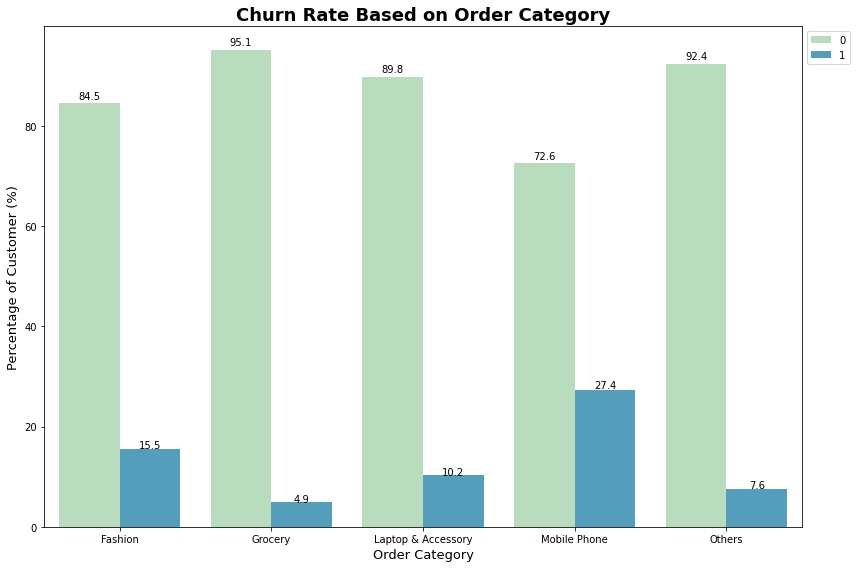

In [ ]:
dfcategory=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()

dfcategory1 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcategory2 = dfcategory.merge(dfcategory1, how='left',
              on='PreferedOrderCat')

dfcategory2.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
dfcategory2['Ratio'] = (dfcategory2['Num_Customer'] / dfcategory2['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcategory2, x='PreferedOrderCat', y='Ratio', hue='Churn', palette='GnBu')
plt.title('Churn Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

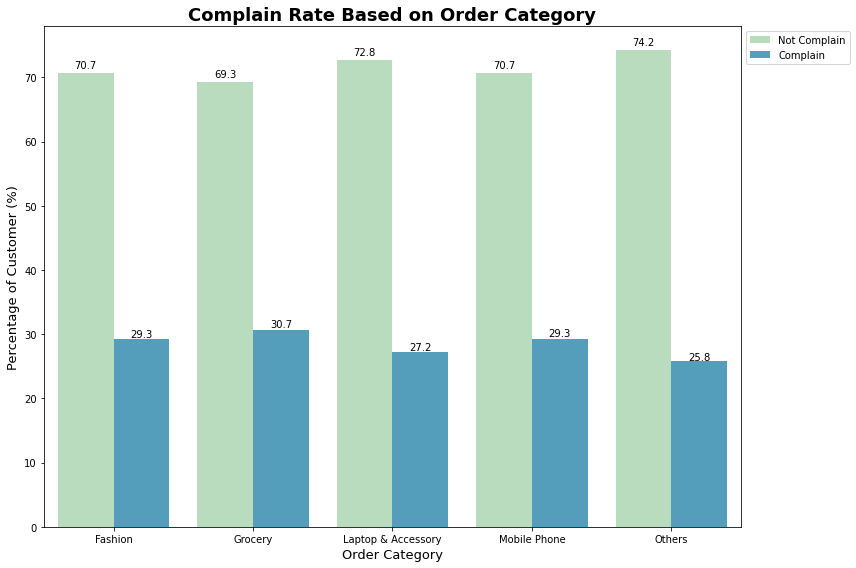

In [ ]:
dfcomplain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain['Complain'] = dfcomplain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

dfcomplain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
dfcomplain3 = dfcomplain.merge(dfcomplain2, how='left',
              on='PreferedOrderCat')

dfcomplain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
dfcomplain3['Ratio'] = (dfcomplain3['Num_Customer'] / dfcomplain3['AllCustomer'] * 100.0).round(2)

#visualisasi
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfcomplain3, x='PreferedOrderCat', y='Ratio', hue='Complain', palette='GnBu')
plt.title('Complain Rate Based on Order Category', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**Insight**: 
- Pelanggan yang melakukan churn karena komplain lebih tinggi dibanding yang tidak komplain dan mayoritas membeli mobile phone
- Komplain paling banyak dilakukan oleh pelanggan membeli grocery atau kebutuhan sehari-hari, lalu disusul mobile phone dan fashion

**Business Recommendation**:
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas

# Action

- Memberikan promo kepada pelanggan berupa kupon atau cashback agar pelanggan terus bertahan atau memperpanjang tenure dan kembali berbelanja di e-commerce.
- Bagi pelanggan yang baru saja membeli barang elektronik, cross-selling dapat dilakukan dengan menawarkan aksesoris elektronik, seperti keyboard, mouse, dll
- Untuk grocery, menawarkan service pengiriman cepat untuk menjaga kualitas produk
- Untuk fashion dan mobile phone, menawarkan tampilan foto produk yang original atau asli dan deskripsi produk yang jelas